In [1]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Estimator

from matplotlib import pyplot as plt
import numpy as np

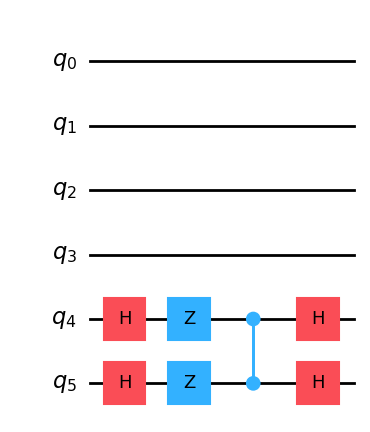

In [2]:
one_step_circuit = QuantumCircuit(6, name=' ONE STEP') 
# Coin operator
one_step_circuit.h([4,5])
one_step_circuit.z([4,5])
one_step_circuit.cz(4,5)
one_step_circuit.h([4,5])
#one_step_circuit.draw()
one_step_circuit.draw("mpl")

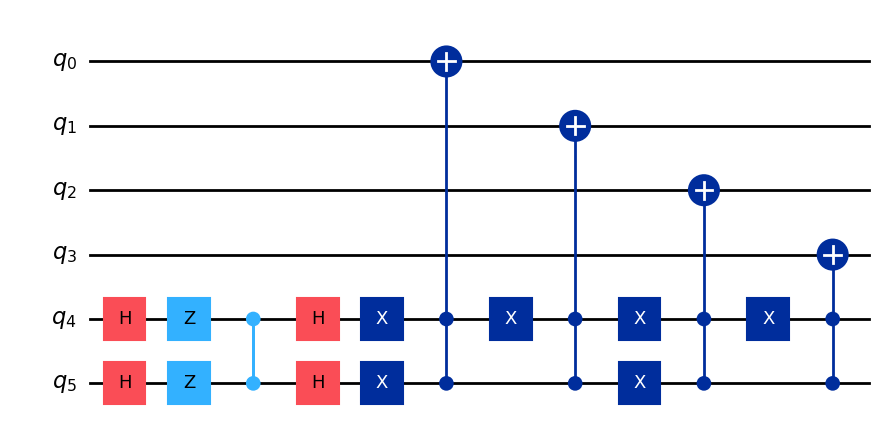

In [3]:
# Shift operator function for 4d-hypercube
def shift_operator(circuit):
    for i in range(0,4):
        circuit.x(4)
        if i%2==0:
            circuit.x(5)
        circuit.ccx(4,5,i)

shift_operator(one_step_circuit)

one_step_gate = one_step_circuit.to_instruction() 
one_step_circuit.draw("mpl")

In [4]:
import numpy as np
from qiskit_aer.primitives import Sampler
 
from qiskit.circuit.library import EfficientSU2
 
n_qubits = 4
circuit = EfficientSU2(n_qubits)
circuit.decompose().draw("mpl")

measured_circuit = circuit.copy()
measured_circuit.measure_all()
 
rng = np.random.default_rng(1234)
params = rng.choice(
    [0, np.pi / 2, np.pi, 3 * np.pi / 2], 
    size=circuit.num_parameters,
)

In [5]:
circuit.num_parameters

32

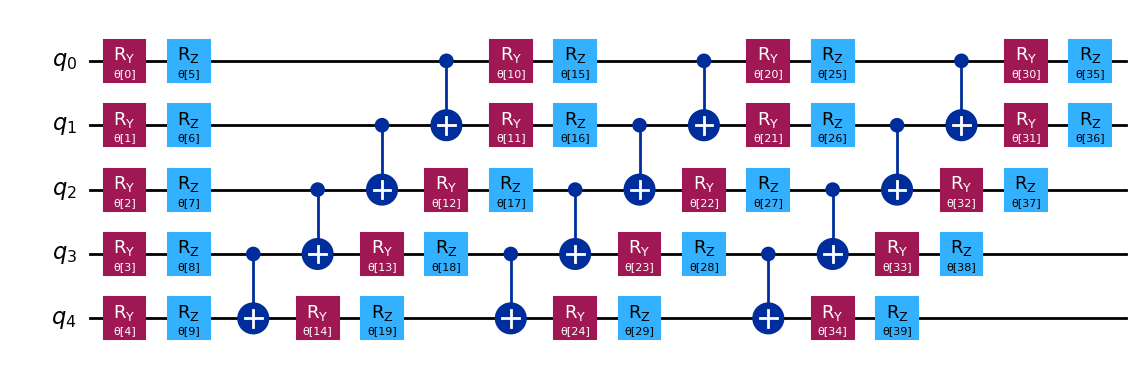

In [6]:
n_qubits = 5
circuit = EfficientSU2(n_qubits)
circuit.decompose().draw("mpl")

In [7]:
# Initialize a Sampler backed by the stabilizer circuit simulator
exact_sampler = Sampler(backend_options=dict(method="stabilizer"))
job = exact_sampler.run(measured_circuit, params)
exact_quasis = job.result().quasi_dists[0]
exact_quasis

{6: 0.0537109375, 15: 0.0517578125, 13: 0.0673828125, 5: 0.056640625, 9: 0.0595703125, 2: 0.06640625, 12: 0.068359375, 7: 0.0576171875, 0: 0.0625, 8: 0.0625, 11: 0.0712890625, 14: 0.05078125, 3: 0.072265625, 1: 0.0634765625, 10: 0.0673828125, 4: 0.068359375}

In [8]:
formatted_results = {format(key, f'0{n_qubits}b'): value for key, value in exact_quasis.items()}
formatted_results

{'00110': 0.0537109375,
 '01111': 0.0517578125,
 '01101': 0.0673828125,
 '00101': 0.056640625,
 '01001': 0.0595703125,
 '00010': 0.06640625,
 '01100': 0.068359375,
 '00111': 0.0576171875,
 '00000': 0.0625,
 '01000': 0.0625,
 '01011': 0.0712890625,
 '01110': 0.05078125,
 '00011': 0.072265625,
 '00001': 0.0634765625,
 '01010': 0.0673828125,
 '00100': 0.068359375}

In [9]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister

num_steps = 3  # Adjust as needed

# Create quantum and classical registers
n = 2 * num_steps + 1
qr = QuantumRegister(n, 'q')
cr = ClassicalRegister(n, 'c')
qc = QuantumCircuit(qr, cr)

# Prepare an initial superposition state (|0⟩ + |1⟩) / sqrt(2)
qc.h(qr[0])

# Perform the quantum walk
for step in range(num_steps):
    # Apply the coin operator (Hadamard gate) on each node except the outermost ones
    for i in range(1, n - 1):
        qc.h(qr[i])
    
    # Apply conditional shift operations
    for i in range(n - 1):
        qc.cp(np.pi, qr[i], qr[i+1])  # Controlled phase flip with pi radians
    
    # Apply conditional shift operations with an inverted phase
    for i in range(n - 1):
        qc.cp(-np.pi, qr[i], qr[i+1])  # Controlled phase flip with -pi radians
    
# Measure the final state
qc.measure(qr, cr)

# Initialize a Sampler backed by the stabilizer circuit simulator
exact_sampler = Sampler(backend_options=dict(method="stabilizer"))
job = exact_sampler.run(qc)
exact_quasis = job.result().quasi_dists[0]
exact_quasis

KeyboardInterrupt: 

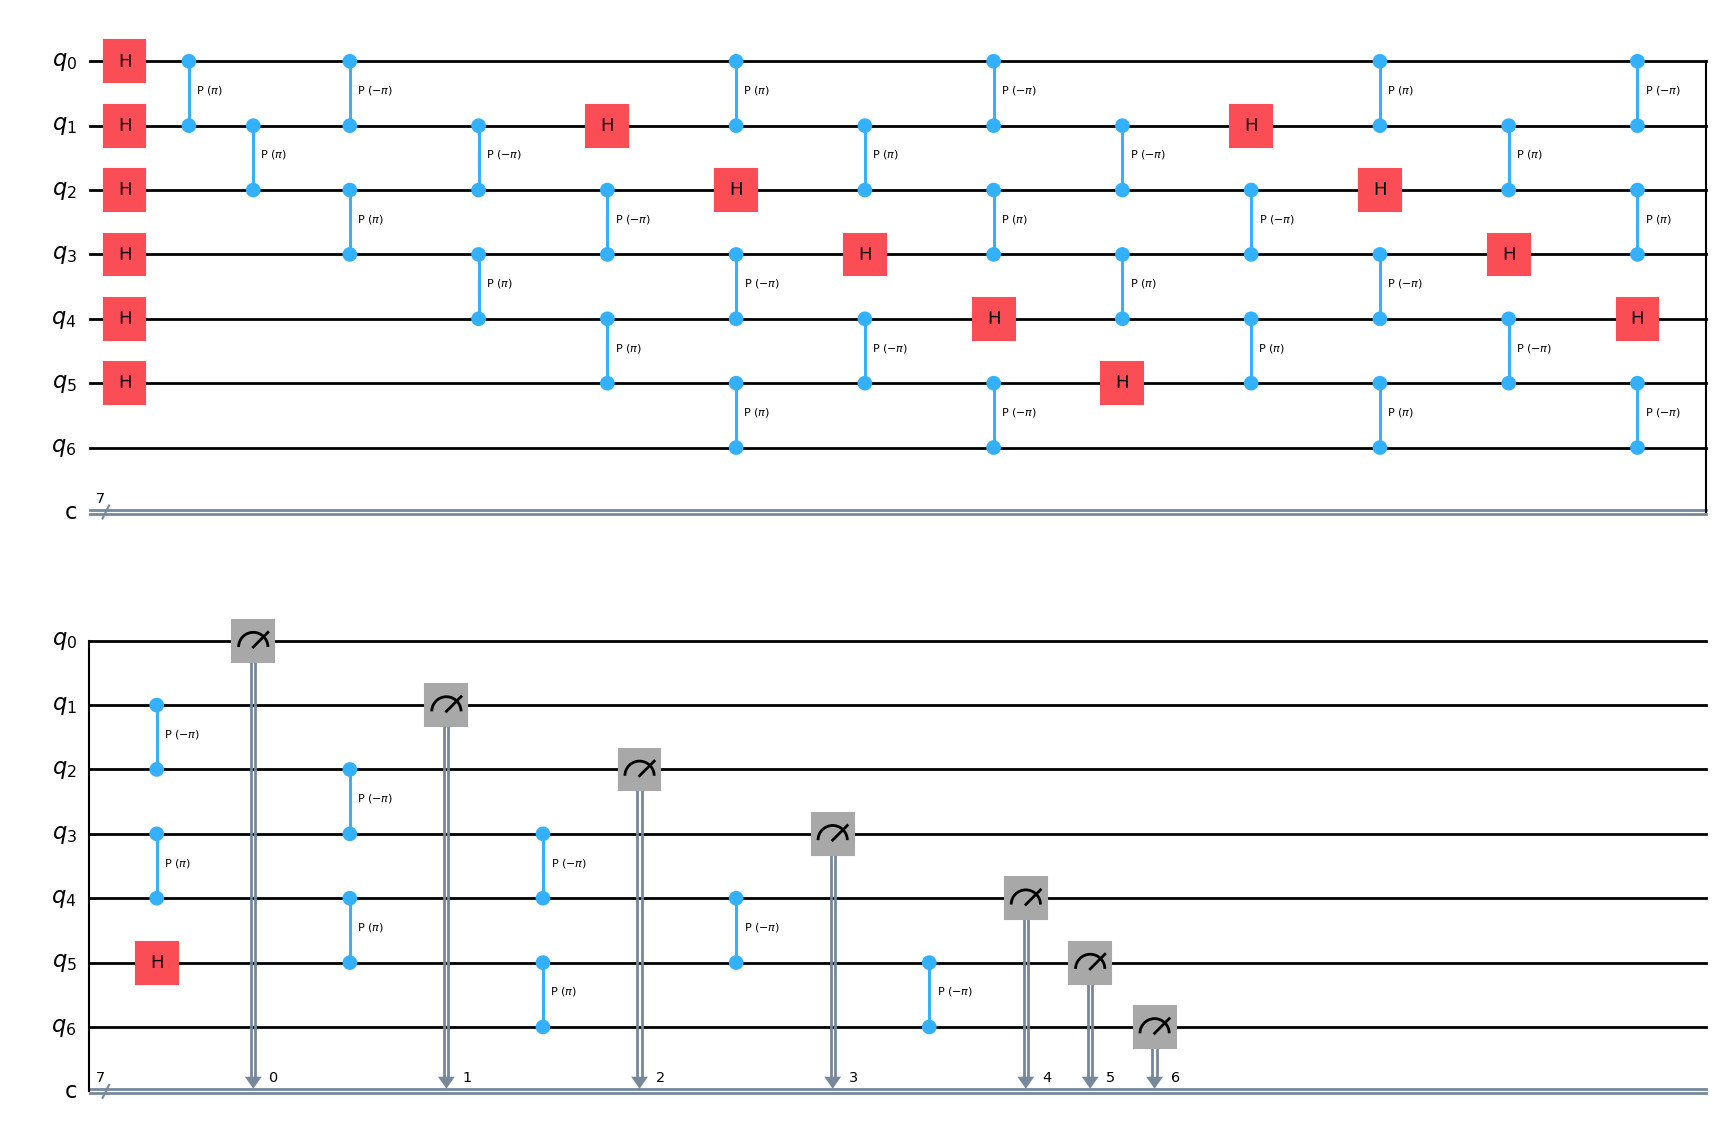

In [ ]:
qc.draw('mpl')

In [ ]:
n_bits = measured_circuit.num_qubits
sorted_quasis = {key : exact_quasis[key] for key in sorted(exact_quasis)}
sorted_quasis

{0: 0.0107421875,
 1: 0.0126953125,
 2: 0.0205078125,
 3: 0.0166015625,
 4: 0.0166015625,
 5: 0.01171875,
 6: 0.015625,
 7: 0.025390625,
 8: 0.01171875,
 9: 0.017578125,
 10: 0.0205078125,
 11: 0.0146484375,
 12: 0.009765625,
 13: 0.0126953125,
 14: 0.017578125,
 15: 0.0166015625,
 16: 0.01171875,
 17: 0.015625,
 18: 0.013671875,
 19: 0.015625,
 20: 0.013671875,
 21: 0.0107421875,
 22: 0.021484375,
 23: 0.01171875,
 24: 0.0146484375,
 25: 0.0126953125,
 26: 0.015625,
 27: 0.0166015625,
 28: 0.013671875,
 29: 0.0185546875,
 30: 0.0146484375,
 31: 0.01953125,
 32: 0.017578125,
 33: 0.015625,
 34: 0.01171875,
 35: 0.0107421875,
 36: 0.017578125,
 37: 0.0126953125,
 38: 0.0185546875,
 39: 0.0126953125,
 40: 0.015625,
 41: 0.0146484375,
 42: 0.0107421875,
 43: 0.0205078125,
 44: 0.013671875,
 45: 0.01953125,
 46: 0.0185546875,
 47: 0.025390625,
 48: 0.0166015625,
 49: 0.01953125,
 50: 0.017578125,
 51: 0.0166015625,
 52: 0.0205078125,
 53: 0.009765625,
 54: 0.01171875,
 55: 0.015625,
 56: 0

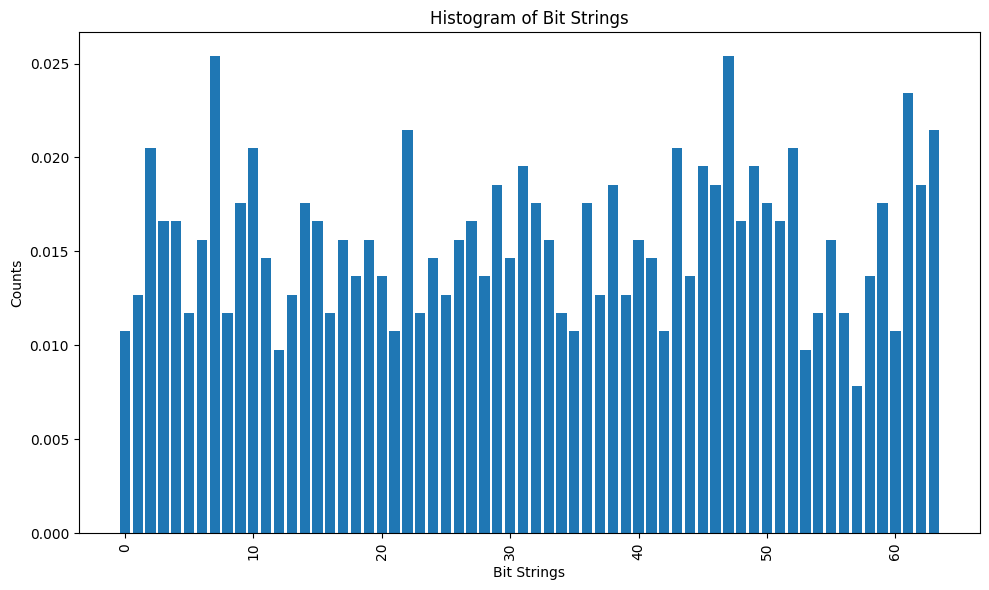

In [ ]:
bit_strings = list(exact_quasis.keys())
counts = list(exact_quasis.values())

# Plot the histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(bit_strings, counts)
plt.xlabel('Bit Strings')
plt.ylabel('Counts')
plt.title('Histogram of Bit Strings')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
num_steps = 3  # Adjust as needed

# Create quantum and classical registers
n = 2 * num_steps + 1
qr = QuantumRegister(n, 'q')
cr = ClassicalRegister(n, 'c')
qc = QuantumCircuit(qr, cr)

# Prepare an initial superposition state (|0⟩ + |1⟩) / sqrt(2)
qc.h(qr[0])

# Perform the quantum walk
for step in range(num_steps):
    # Apply the coin operator (Hadamard gate) on each node except the outermost ones
    for i in range(1, n - 1):
        qc.h(qr[i])
    
    # Apply conditional shift operations
    for i in range(n - 1):
        qc.cp(np.pi, qr[i], qr[i+1])  # Controlled phase flip with pi radians
    
    # Apply conditional shift operations with an inverted phase
    for i in range(n - 1):
        qc.cp(-np.pi, qr[i], qr[i+1])  # Controlled phase flip with -pi radians
    
# Measure the final state
qc.measure(qr, cr)

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=5000)
result = job.result()
counts = result.get_counts()



NameError: name 'QuantumRegister' is not defined

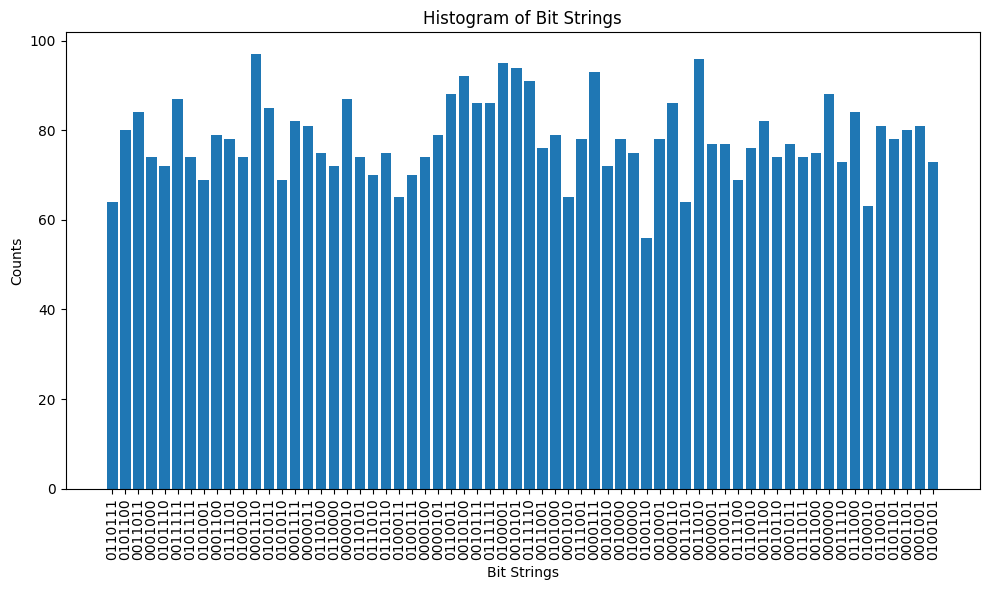

In [ ]:
bit_strings = list(counts.keys())
counts = list(counts.values())

# Plot the histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(bit_strings, counts)
plt.xlabel('Bit Strings')
plt.ylabel('Counts')
plt.title('Histogram of Bit Strings')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate

one_step_circuit = QuantumCircuit(6, name=' ONE STEP') 
# Coin operator
#one_step_circuit.h([4,5])
#one_step_circuit.z([4,5])
#one_step_circuit.cz(4,5)
#one_step_circuit.h([4,5])
#one_step_circuit.x(4)
beta = np.pi / 4  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)],
                     [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')

one_step_circuit.append(R_gate, [5])
one_step_circuit.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ R ├
     └───┘

In [ ]:
# Shift operator function for 4d-hypercube
def shift_operator(circuit):
    for i in range(0,4):
        circuit.x(4)
        if i%2==0:
            circuit.x(5)
        circuit.ccx(4,5,i)

#shift_operator(one_step_circuit)

one_step_gate = one_step_circuit.to_instruction() 
one_step_circuit.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ R ├
     └───┘

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import circuit_drawer
import numpy as np

# Define the quantum circuit and gate
one_step_circuit = QuantumCircuit(6, name=' ONE STEP') 
# Coin operator
one_step_circuit.h([4, 5])
one_step_circuit.z([4, 5])
one_step_circuit.cz(4, 5)
one_step_circuit.h([4, 5])

# Shift operator function for 4d-hypercube
def shift_operator(circuit):
    for i in range(0, 4):
        circuit.x(4)
        if i % 2 == 0:
            circuit.x(5)
        circuit.ccx(4, 5, i)

shift_operator(one_step_circuit)

one_step_gate = one_step_circuit.to_instruction()

# Create a Quantum Circuit for 1000 steps
num_steps = 15
qr = QuantumRegister(6, 'q')
cr = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qr, cr)

# Apply the one_step_gate 1000 times
for _ in range(num_steps):
    circuit.append(one_step_gate, qr)

# Measurement
circuit.measure(qr, cr)

# Draw the circuit
#circuit_drawer(circuit, scale=0.7, output='mpl')


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Estimator
#from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler

from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
#from qiskit_ibm_runtime import Session, SamplerV2 as Sampler

from qiskit.primitives import Sampler

from matplotlib import pyplot as plt
import numpy as np

In [ ]:
one_step_circuit = QuantumCircuit(6, name=' ONE STEP') 

beta = np.pi / 5  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)],
                     [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='C')

one_step_circuit.append(R_gate, [4])
one_step_circuit.append(R_gate, [5])

# Shift operator function for 4d-hypercube
def shift_operator(circuit):
    for i in range(0, 4):
        circuit.x(4)
        if i % 2 == 0:
            circuit.x(5)
        circuit.ccx(4, 5, i)

shift_operator(one_step_circuit)

one_step_gate = one_step_circuit.to_instruction()


num_steps = 6
qr = QuantumRegister(6, 'q')
cr = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qr, cr)

# Apply the one_step_gate 1000 times
for _ in range(num_steps):
    circuit.append(one_step_gate, qr)
    
circuit.measure(qr, cr)
    
circuit_drawer(circuit, scale=0.7, output='mpl')

NameError: name 'UnitaryGate' is not defined

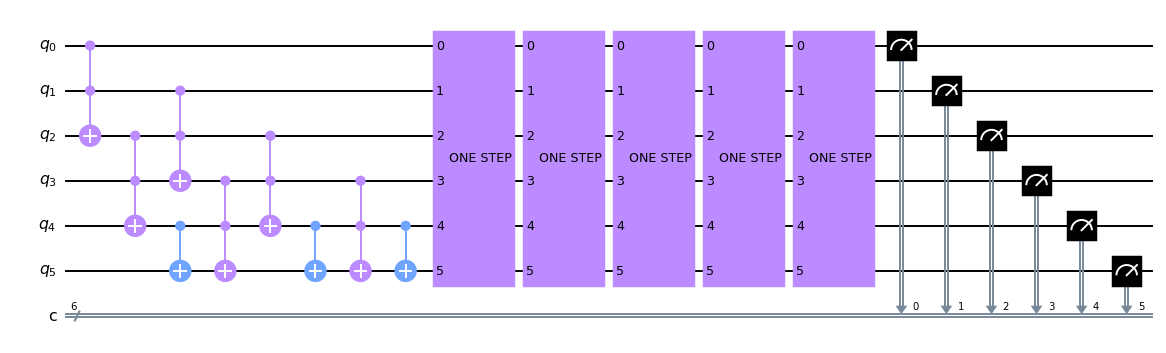

In [ ]:
circuit_drawer(circuit, scale=0.7, output='mpl')

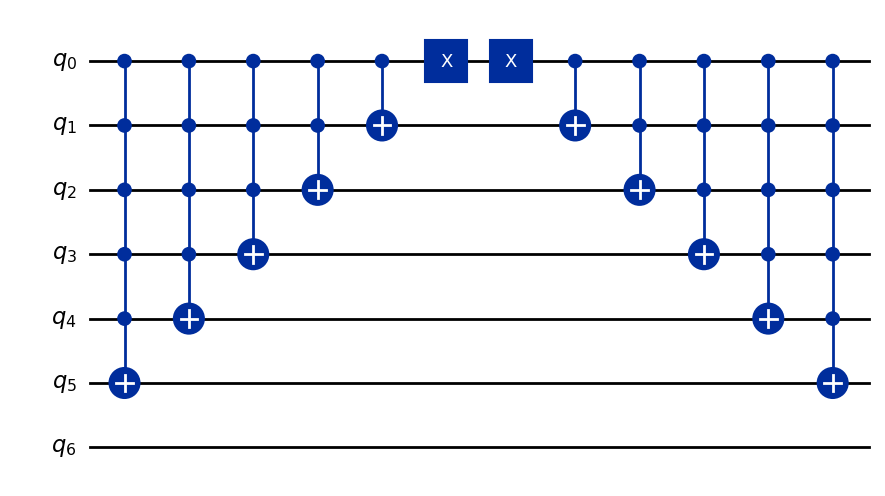

In [3]:
from qiskit.circuit.library import MCXGate

one_step_circuit = QuantumCircuit(7, name='ONE STEP')

gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)

def incrementBlock(circuit):
    circuit.append(gate5, [0, 1, 2, 3, 4, 5])
    circuit.append(gate4, [0, 1, 2, 3, 4])
    circuit.append(gate3, [0, 1, 2, 3])
    circuit.ccx(0,1,2)
    circuit.cx(0,1)
    circuit.x(0)

def decrementBlock(circuit):
    circuit.x(0)
    circuit.cx(0,1)
    circuit.ccx(0,1,2)
    circuit.append(gate3, [0, 1, 2, 3])
    circuit.append(gate4, [0, 1, 2, 3, 4])
    circuit.append(gate5, [0, 1, 2, 3, 4, 5])

# Apply the incrementBlock function
incrementBlock(one_step_circuit)
decrementBlock(one_step_circuit)
one_step_gate = one_step_circuit.to_instruction()

one_step_circuit.draw('mpl')


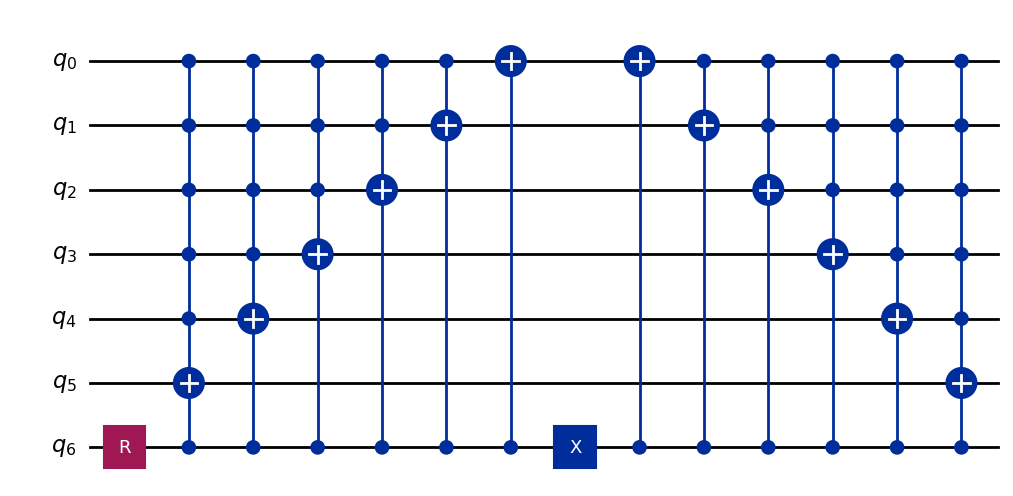

In [4]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate


one_step_circuit = QuantumCircuit(7, name='ONE STEP')


beta = np.pi / 5  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')


gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit):
    circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])
    circuit.append(gate5, [0, 1, 2, 3, 6, 4])
    circuit.append(gate4, [0, 1, 2, 6, 3])
    circuit.append(gate3, [0, 1, 6, 2])
    circuit.ccx(0, 6, 1)
    circuit.cx(6,0)

def decrementBlock(circuit):
    circuit.cx(6,0)
    circuit.ccx(0, 6, 1)
    circuit.append(gate3, [0, 1, 6, 2])
    circuit.append(gate4, [0, 1, 2, 6, 3])
    circuit.append(gate5, [0, 1, 2, 3, 6, 4])
    circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])

one_step_circuit.append(R_gate, [6])
incrementBlock(one_step_circuit)
one_step_circuit.x(6)
decrementBlock(one_step_circuit)
one_step_gate = one_step_circuit.to_instruction()

one_step_circuit.draw('mpl')

In [381]:
gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit):
    circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])
    circuit.append(gate5, [0, 1, 2, 3, 6, 4])
    circuit.append(gate4, [0, 1, 2, 6, 3])
    circuit.append(gate3, [0, 1, 6, 2])
    circuit.ccx(0, 6, 1)
    circuit.cx(6,0)

def decrementBlock(circuit):
    circuit.cx(6,0)
    circuit.ccx(0, 6, 1)
    circuit.append(gate3, [0, 1, 6, 2])
    circuit.append(gate4, [0, 1, 2, 6, 3])
    circuit.append(gate5, [0, 1, 2, 3, 6, 4])
    circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])

def create_coin(angle = 1):
    beta = np.pi / angle
    C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
    coin = UnitaryGate(C_matrix, label='R')
    return coin

def initialize_quantum_circuit(qubits=2, angle = 1, bitString='000000'):
    circuit_base, coin = quantum_base(qubits, angle)
    circuit_base.initialize(bitString, circuit_base.qubits[:qubits-1])
    return circuit_base, coin

def get_single_step(qubits, coin):
    one_step_circuit = QuantumCircuit(qubits, name='STEP')
    #one_step_circuit.reset(6)
    one_step_circuit.h(6)
    one_step_circuit.append(coin, [6])
    incrementBlock(one_step_circuit)
    one_step_circuit.x(6)
    decrementBlock(one_step_circuit)
    one_step_gate = one_step_circuit.to_instruction()

    return one_step_gate
    

def circuit_initialized_qw_steps(num_qubits=7, num_steps=1, angle = 1, bitString='000000'):

    qr = QuantumRegister(num_qubits, 'q')
    cr = ClassicalRegister(num_qubits, 'c')
    coin = create_coin()

    circuit = QuantumCircuit(qr, cr)

    circuit.initialize(bitString, circuit.qubits[:num_qubits-1])

    one_step_gate = get_single_step(num_qubits, coin)

    #circuit.h(6)
    for _ in range(num_steps):
        circuit.append(one_step_gate, qr)
        
    circuit.measure(qr,cr)

    return circuit

In [383]:
circuit = circuit_initialized_qw_steps(num_qubits=7, num_steps=15, angle=2, bitString='000000')
sampler = Sampler()
job = sampler.run(circuits=[circuit], parameter_values=[[]], parameters=[[]])
job_result = job.result()
job_result

SamplerResult(quasi_dists=[{1: 0.048828125000022, 3: 0.061798095703151, 5: 0.044067382812518, 7: 0.003692626953128, 9: 0.305175781250157, 11: 0.128936767578184, 13: 0.005981445312503, 15: 3.0517578125e-05, 51: 3.0517578125e-05, 53: 0.003051757812502, 55: 0.019073486328134, 57: 0.00048828125, 59: 0.011016845703131, 61: 0.027465820312513, 63: 0.037384033203141, 65: 0.000762939453125, 67: 0.012207031250005, 69: 0.046417236328148, 71: 0.031250000000015, 73: 0.056427001953155, 75: 0.004394531250001, 77: 3.0517578125e-05, 113: 3.0517578125e-05, 115: 0.004394531250002, 117: 0.056427001953152, 119: 0.031250000000015, 121: 0.046417236328147, 123: 0.012207031250005, 125: 0.000762939453125}], metadata=[{}])

In [7]:
gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit):
    circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])
    circuit.append(gate5, [0, 1, 2, 3, 6, 4])
    circuit.append(gate4, [0, 1, 2, 6, 3])
    circuit.append(gate3, [0, 1, 6, 2])
    circuit.ccx(0, 6, 1)
    circuit.cx(6,0)

def decrementBlock(circuit):
    circuit.cx(6,0)
    circuit.ccx(0, 6, 1)
    circuit.append(gate3, [0, 1, 6, 2])
    circuit.append(gate4, [0, 1, 2, 6, 3])
    circuit.append(gate5, [0, 1, 2, 3, 6, 4])
    circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])

def create_coin(angle=1):
    beta = np.pi / angle
    C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
    coin = UnitaryGate(C_matrix, label='R')
    return coin

def initialize_quantum_circuit(qubits=2, angle=1, bitString='000000'):
    qr = QuantumRegister(qubits, 'q')
    circuit_base = QuantumCircuit(qr)
    coin = create_coin(angle)
    circuit_base.initialize(bitString, qr[:qubits-1])
    return circuit_base, coin

def get_single_step(qubits, coin):
    one_step_circuit = QuantumCircuit(qubits, name='STEP')
    one_step_circuit.h(6)
    one_step_circuit.append(coin, [6])
    incrementBlock(one_step_circuit)
    one_step_circuit.x(6)
    decrementBlock(one_step_circuit)
    one_step_gate = one_step_circuit.to_instruction()
    return one_step_gate

def circuit_initialized_qw_steps(num_qubits=7, num_steps=1, angle=1, bitString='000000'):
    qr = QuantumRegister(num_qubits, 'q')
    cr = ClassicalRegister(num_qubits, 'c')
    coin = create_coin(angle)

    circuit = QuantumCircuit(qr, cr)
    circuit.initialize(bitString, qr[:num_qubits-1])

    one_step_gate = get_single_step(num_qubits, coin)
    #circuit.h(6)
    for _ in range(num_steps):
        circuit.append(one_step_gate, qr)

    circuit.measure(qr, cr)
    return circuit

# Example usage:

In [8]:
circuit = circuit_initialized_qw_steps(num_qubits=7, num_steps=16, angle=2, bitString='000000')
sampler = Sampler()
job = sampler.run(circuits=[circuit], parameter_values=[[]], parameters=[[]])
job_result = job.result()
job_result

SamplerResult(quasi_dists=[{0: 0.018692016601571, 2: 0.030899047851576, 4: 0.06446838378909, 6: 0.090469360351603, 8: 0.006729125976565, 10: 0.312026977539227, 12: 0.090469360351603, 14: 0.003433227539065, 16: 1.5258789062e-05, 50: 1.5258789062e-05, 52: 0.001846313476564, 54: 0.016616821289071, 56: 0.000747680664063, 58: 0.018692016601572, 60: 0.023208618164074, 62: 0.018692016601571, 64: 0.018692016601572, 66: 0.009536743164067, 68: 1.5258789063e-05, 70: 0.028213500976578, 72: 0.049575805664088, 74: 0.042861938476583, 76: 0.002578735351564, 78: 1.5258789062e-05, 112: 1.5258789062e-05, 114: 0.002578735351564, 116: 0.042861938476585, 118: 0.049575805664087, 120: 0.028213500976576, 122: 1.5258789062e-05, 124: 0.009536743164067, 126: 0.018692016601571}], metadata=[{}])

In [12]:
def to_binary_list(list_of_numbers, n_bits):
    binary_list = [format(num, f'0{n_bits}b') for num in list_of_numbers]
    return binary_list

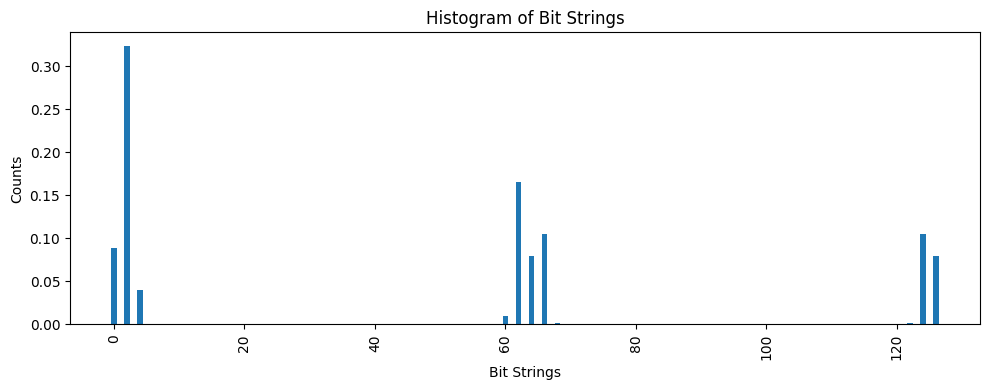

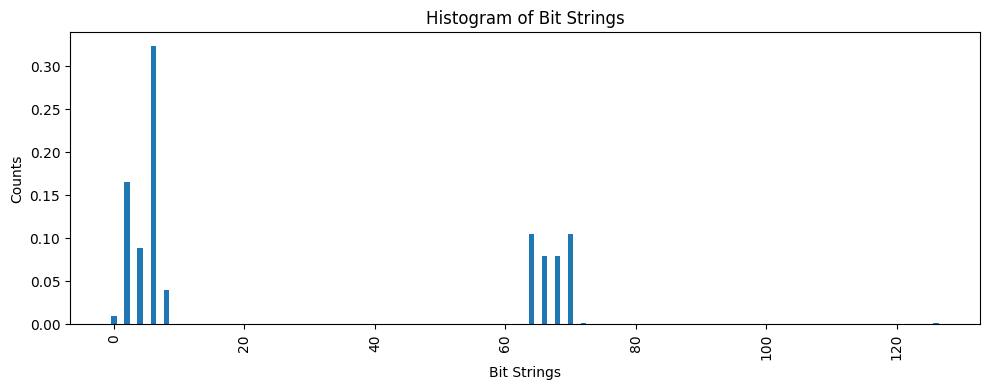

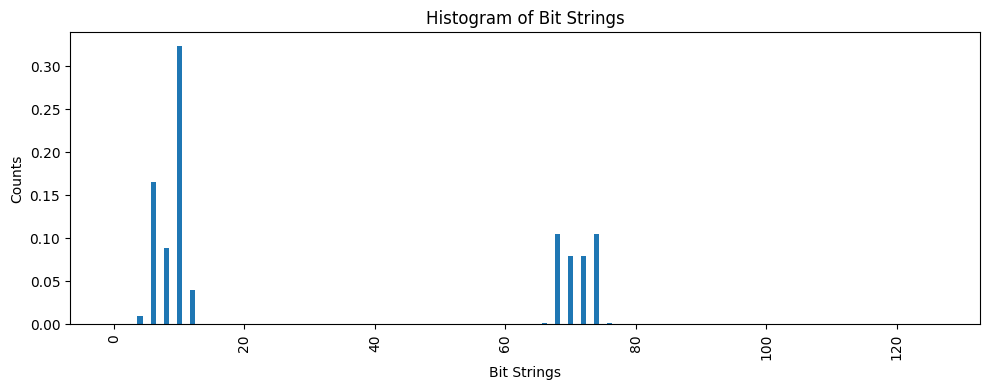

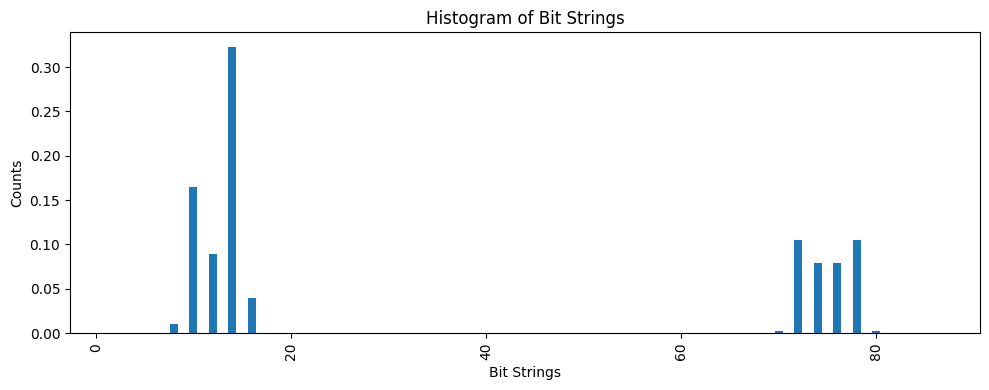

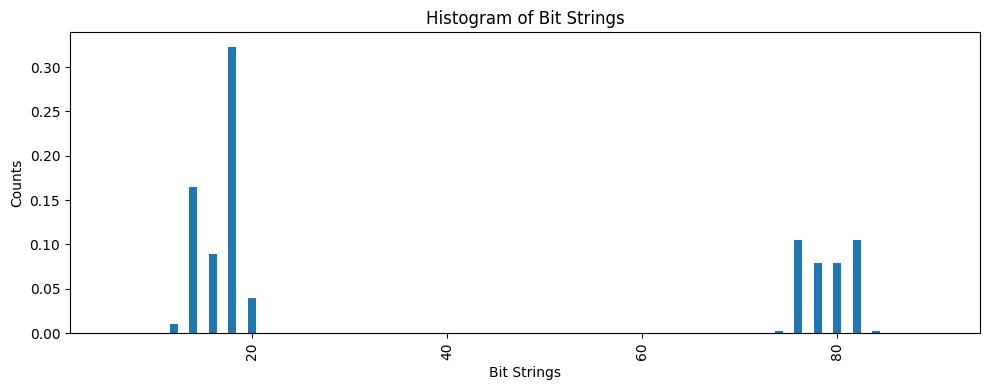

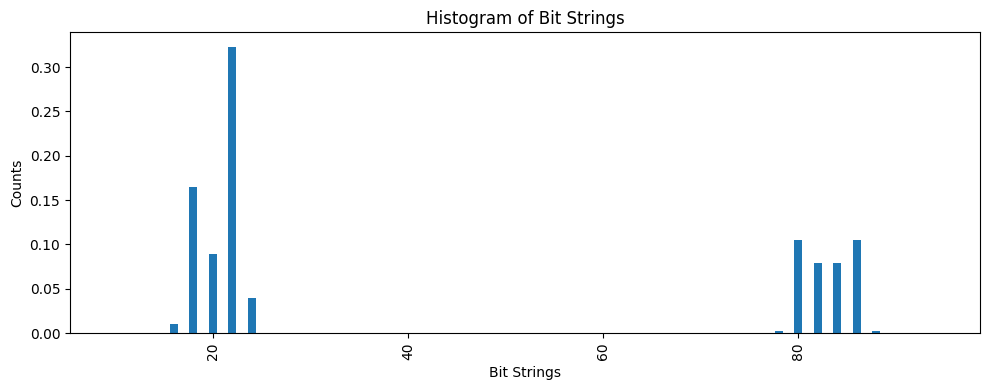

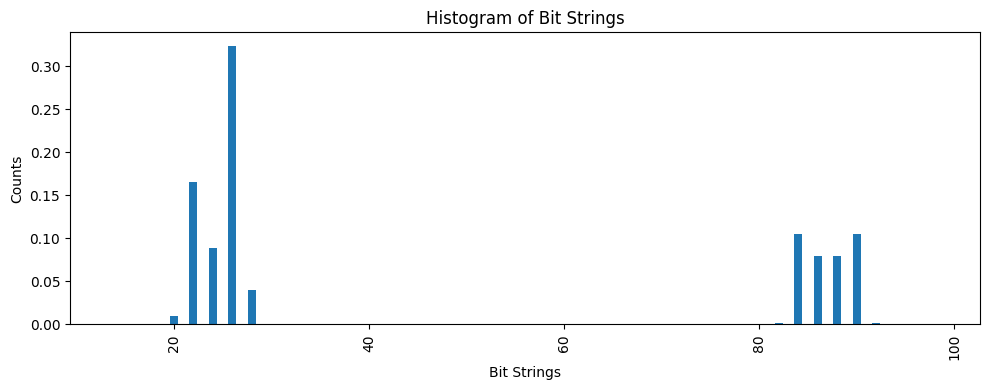

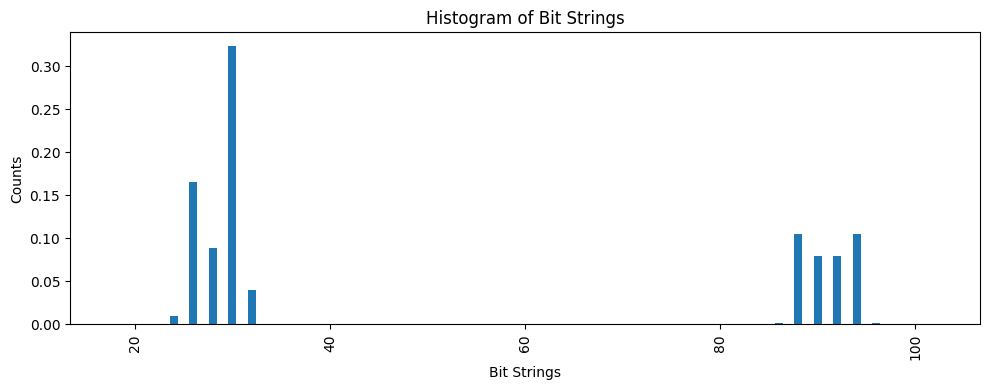

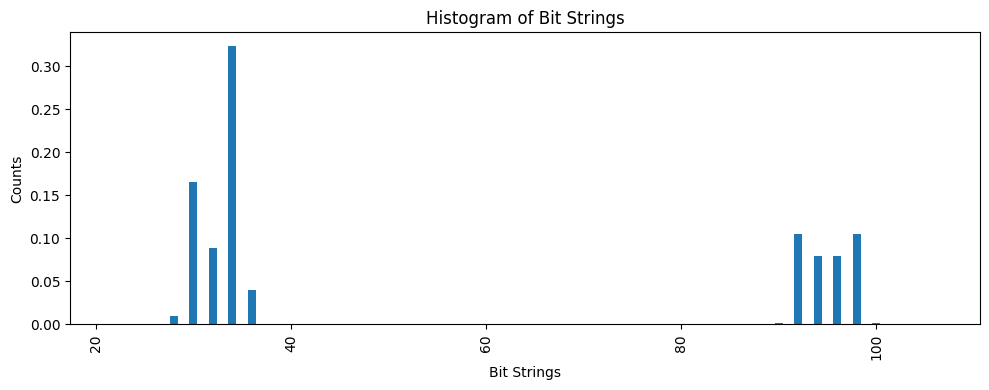

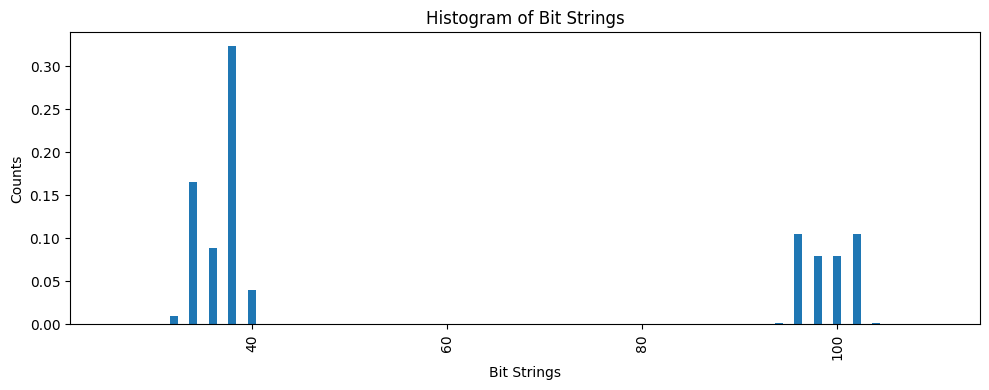

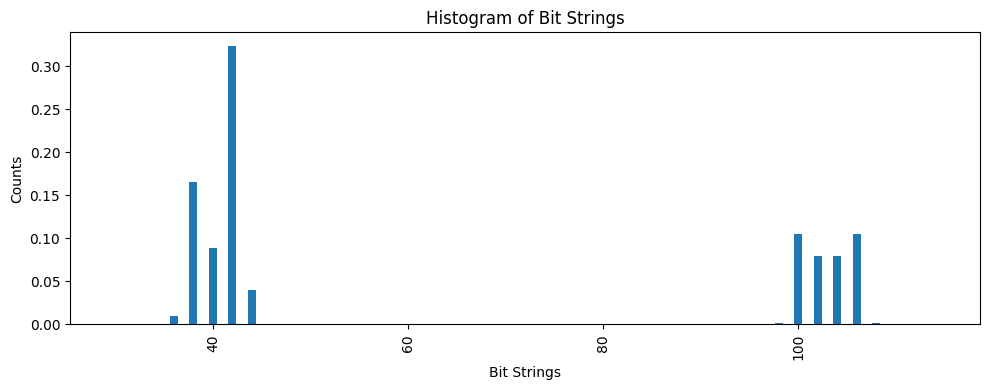

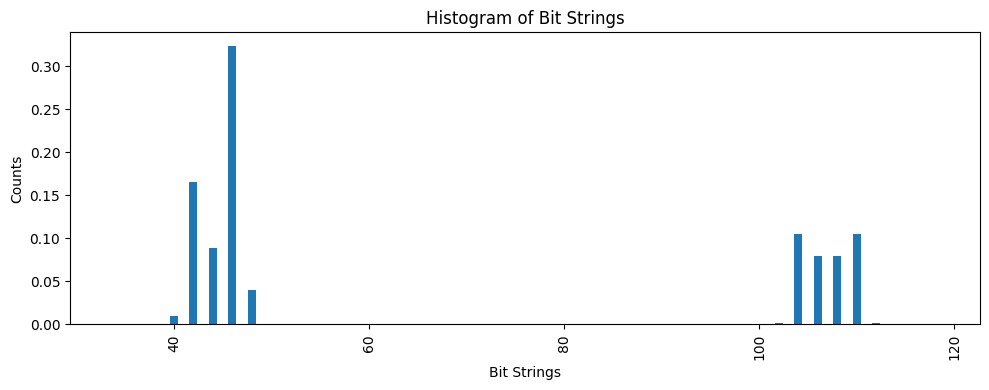

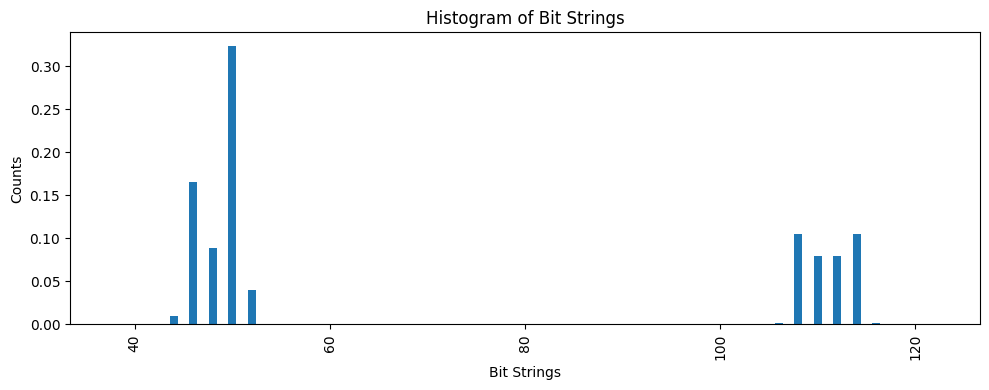

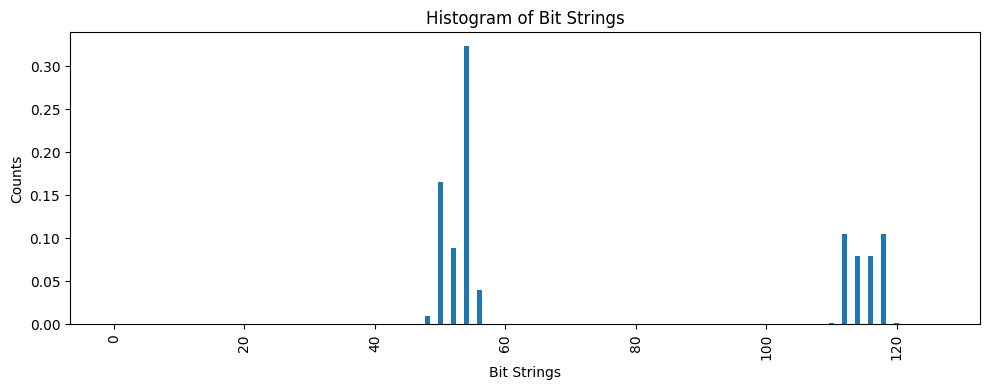

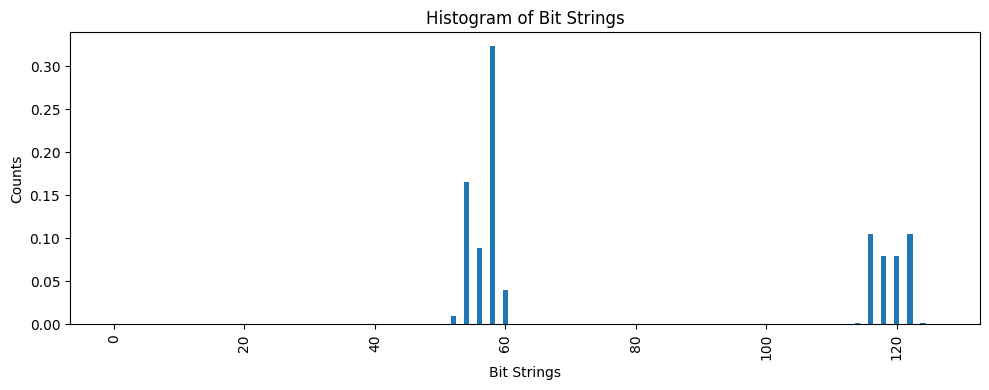

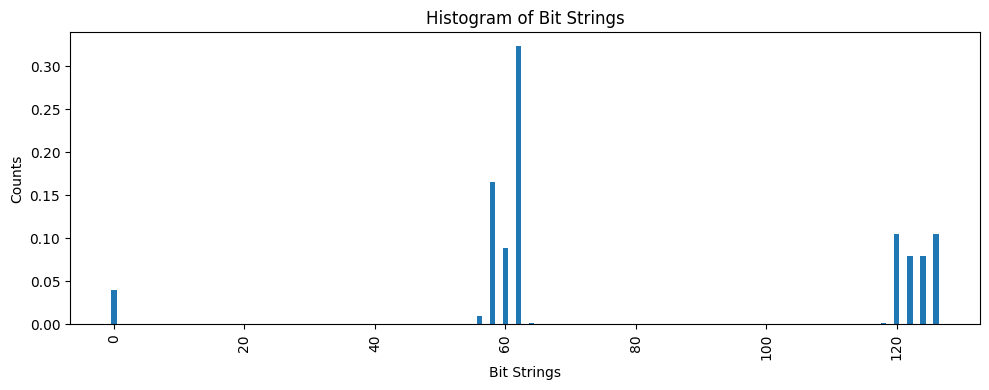

In [388]:
list_num = [4*i for i in range(0,16)]
list_binary_rep = to_binary_list(list_num,6)

for binary_string in list_binary_rep:
    circuit = circuit_initialized_qw_steps(num_qubits=7, num_steps=12, angle = 3, bitString=binary_string)
    sampler = Sampler()
    job = sampler.run(circuits=[circuit], parameter_values=[[]], parameters=[[]])
    job_result = job.result()

    counts = job_result.quasi_dists[0]

    bit_strings = list(counts.keys())
    counts = list(counts.values())

    plt.figure(figsize=(10, 4)) 
    plt.bar(bit_strings, counts)
    plt.xlabel('Bit Strings')
    plt.ylabel('Counts')
    plt.title('Histogram of Bit Strings')
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.tight_layout()

    # Show the plot
    plt.show()

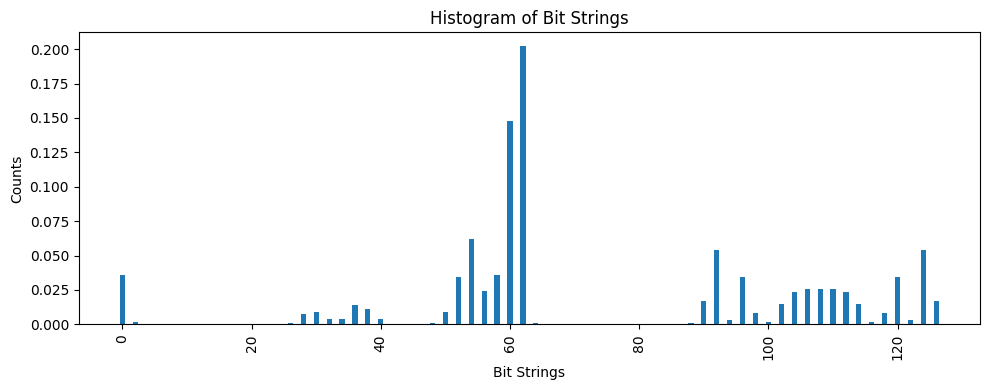

In [ ]:
circuit = circuit_initialized_qw_steps(num_qubits=7, num_steps=25, angle = -4, bitString='101101')
sampler = Sampler()
job = sampler.run(circuits=[circuit], parameter_values=[[]], parameters=[[]])
job_result = job.result()

counts = job_result.quasi_dists[0]
bit_strings = list(counts.keys())
counts = list(counts.values())

plt.figure(figsize=(10, 4)) 
plt.bar(bit_strings, counts)
plt.xlabel('Bit Strings')
plt.ylabel('Counts')
plt.title('Histogram of Bit Strings')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()

In [66]:
def get_single_step(angle = 1):
    one_step_circuit = QuantumCircuit(7, name='STEP pi/'+str(angle))
    beta = np.pi / angle
    C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
    R_gate = UnitaryGate(C_matrix, label='R')

    gate3 = MCXGate(3)
    gate4 = MCXGate(4)
    gate5 = MCXGate(5)
    gate6 = MCXGate(6)

    def incrementBlock(circuit):
        circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])
        circuit.append(gate5, [0, 1, 2, 3, 6, 4])
        circuit.append(gate4, [0, 1, 2, 6, 3])
        circuit.append(gate3, [0, 1, 6, 2])
        circuit.ccx(0, 6, 1)
        circuit.cx(6,0)

    def decrementBlock(circuit):
        circuit.cx(6,0)
        circuit.ccx(0, 6, 1)
        circuit.append(gate3, [0, 1, 6, 2])
        circuit.append(gate4, [0, 1, 2, 6, 3])
        circuit.append(gate5, [0, 1, 2, 3, 6, 4])
        circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])

    one_step_circuit.append(R_gate, [6])
    incrementBlock(one_step_circuit)
    one_step_circuit.x(6)
    decrementBlock(one_step_circuit)
    one_step_gate = one_step_circuit.to_instruction()

    return one_step_gate

def get_circuit_qw_steps(num_qubits=7, num_steps=1, angle = 1):

    qr = QuantumRegister(num_qubits, 'q')
    cr = ClassicalRegister(num_qubits, 'c')
    circuit = QuantumCircuit(qr, cr)

    one_step_gate = get_single_step(angle)

    #circuit.h(6)
    
    for _ in range(num_steps):
        circuit.h(6)
        circuit.append(one_step_gate, qr)
        
    circuit.measure(qr,cr)

    return circuit

def get_circuit_qw_steps_and_transformation(transformation, num_qubits=7, num_steps=1, angle = 1):

    qr = QuantumRegister(num_qubits, 'q')
    cr = ClassicalRegister(num_qubits, 'c')
    circuit = QuantumCircuit(qr, cr)

    one_step_gate = get_single_step(angle)

    #circuit.h(6)
    
    for _ in range(num_steps):
        circuit.h(6)
        circuit.append(one_step_gate, qr)
    
    transformation(circuit)
    transformation(circuit)
    transformation(circuit)
    transformation(circuit)

    circuit.measure(qr,cr)

    return circuit

In [284]:
def get_quasi_dist_in_executions( sampler, execution_number=10, angles = [-2,2]):

    list_quasi_probs = []
    for i in range(execution_number):
        list_quasi_probs.append([[] for i in angles ])

    total_of_numbers = int(64/execution_number)
    list_num = [total_of_numbers*i for i in range(0,execution_number+0)]
    list_binary_rep = to_binary_list(list_num,6)

    index_row = 0
    for i in range(execution_number):

        index_col = 0

        for j in angles:
            #circuit_aux = get_circuit_qw_steps(num_steps=i+1, angle=j)
            circuit_aux = circuit_initialized_qw_steps(num_qubits=7, num_steps=i, angle = j, bitString=list_binary_rep[index_row])
            job = sampler.run(circuits=[circuit_aux], parameter_values=[[]], parameters=[[]])
            job_result = job.result()
            counts = job_result.quasi_dists[0]
            list_quasi_probs[index_row][index_col].append(counts)

            index_col = index_col + 1
        index_row+=1

    return list_quasi_probs

def get_quasi_dist_in_transformation( sampler, execution_number=10, angles = [-2,2]):

    list_quasi_probs = []
    for i in range(execution_number):
        list_quasi_probs.append([[] for i in angles ])

    index_row = 0
    for i in range(execution_number):

        index_col = 0

        for j in angles:
            circuit_aux = get_circuit_qw_steps_and_transformation(incrementBlock,num_steps=i+1, angle=j)
            job = sampler.run(circuits=[circuit_aux], parameter_values=[[]], parameters=[[]])
            job_result = job.result()
            counts = job_result.quasi_dists[0]
            list_quasi_probs[index_row][index_col].append(counts)

            index_col = index_col + 1
        index_row+=1

    return list_quasi_probs

In [10]:
def generate_numbers(a, b, step=1):
    if a > b:
        return "Error: 'a' should be less than or equal to 'b'"
    result = []
    current = a
    while current <= b:
        result.append(current)
        current += step
    
    return result

# Example usage:
numbers = generate_numbers(1, 10, 0.5)

In [309]:
#from qiskit.primitives import Sampler
#sampler = Sampler()
list_of_denominators = generate_numbers(-5, 5, 0.3)
#print("list of denominators: ",list_of_denominators)
list_quasi_probs = get_quasi_dist_in_executions(sampler, execution_number=21, angles=[2])

In [10]:
list_quasi_probs_trans = get_quasi_dist_in_transformation(sampler, execution_number=32, angles=list_of_denominators)

In [310]:
vectors = generate_list_of_vectors(list_quasi_probs)
#vectors_transf = generate_list_of_vectors(list_quasi_probs_trans)

In [311]:
len(vectors)

21

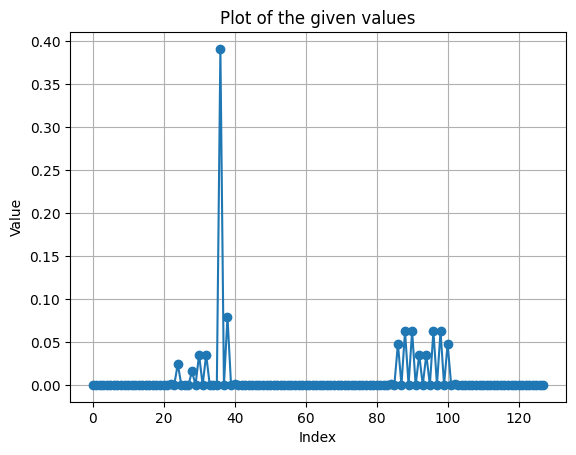

In [312]:
import matplotlib.pyplot as plt

# Your list of values
values = vectors[10]

# Generate x-axis values (indices of the list)
x_values = range(len(values))

# Plot the values
plt.plot(x_values, values, marker='o', linestyle='-')

# Labeling the axes and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of the given values')

# Display the plot
plt.grid(True)
plt.show()

In [31]:
list_num = [i for i in range(0,64)]
list_binary_rep = to_binary_list(list_num,6)


list_of_vectors = []

for binary_string in list_binary_rep:
    circuit = circuit_initialized_qw_steps(num_qubits=7, num_steps=15, angle = -3, bitString=binary_string)
    sampler = Sampler()
    job = sampler.run(circuits=[circuit], parameter_values=[[]], parameters=[[]])
    job_result = job.result()

    vect = np.zeros(128)
    for key, value in job_result.quasi_dists[0].items():
        vect[key] = value
    list_of_vectors.append(vect)

    circuit = circuit_initialized_qw_steps(num_qubits=7, num_steps=16, angle = -3, bitString=binary_string)
    sampler = Sampler()
    job = sampler.run(circuits=[circuit], parameter_values=[[]], parameters=[[]])
    job_result = job.result()

    vect = np.zeros(128)
    for key, value in job_result.quasi_dists[0].items():
        vect[key] = value
    list_of_vectors.append(vect)
    

In [32]:
vectors = list_of_vectors
Y = scaled_image[0,:,0]
coefficients = linear_combination(vectors, Y)
print("Coeficientes de la combinación lineal:", coefficients)
reconstructed_Y = np.dot(np.array(vectors).T, coefficients)
print("Vector reconstruido:", reconstructed_Y)
print("Vector original:", Y)

Coeficientes de la combinación lineal: [-44.68387799  42.99829215 -41.77007115  42.20078238 -41.31406697
  42.96506919 -41.61923159  43.12515611 -41.40677425  45.76456263
 -44.54240825  45.33402912 -44.33988816  50.10861853 -48.50816613
  50.4429424  -48.58231282  54.37036376 -53.19476209  55.1435534
 -54.32988829  58.40552845 -56.69569137  59.35821523 -57.32506139
  58.72030192 -57.32508265  58.51273622 -57.42383561  62.18540712
 -60.75164757  61.28930551 -59.61490718  60.62267975 -58.91381372
  57.50831243 -55.95492746  56.45645436 -54.84376924  54.24622092
 -52.50210923  53.28383534 -51.5918191   52.29556451 -50.72410067
  51.33279564 -49.61553598  52.95702913 -51.18867973  52.53970163
 -51.02782311  55.21573165 -53.71389447  56.22504179 -54.62395264
  59.14397541 -57.66329803  58.15949425 -56.7479003   59.92077252
 -58.38937262  57.32721115 -55.59678061  56.55587404 -54.74251608
  54.67732563 -53.06084355  54.73397024 -53.31505986  54.90124334
 -53.23730064  55.74560242 -53.8490479

In [145]:
def generate_list_of_vectors(list_quasi_probs):
    list_of_vectors = []

    for vectors in list_quasi_probs:
        for vector in vectors:
            vect = np.zeros(128)
            for key, value in vector[0].items():
                #print(f"Key: {key}, Value: {value}")
                vect[key] = value
            list_of_vectors.append(vect)
    
    return list_of_vectors

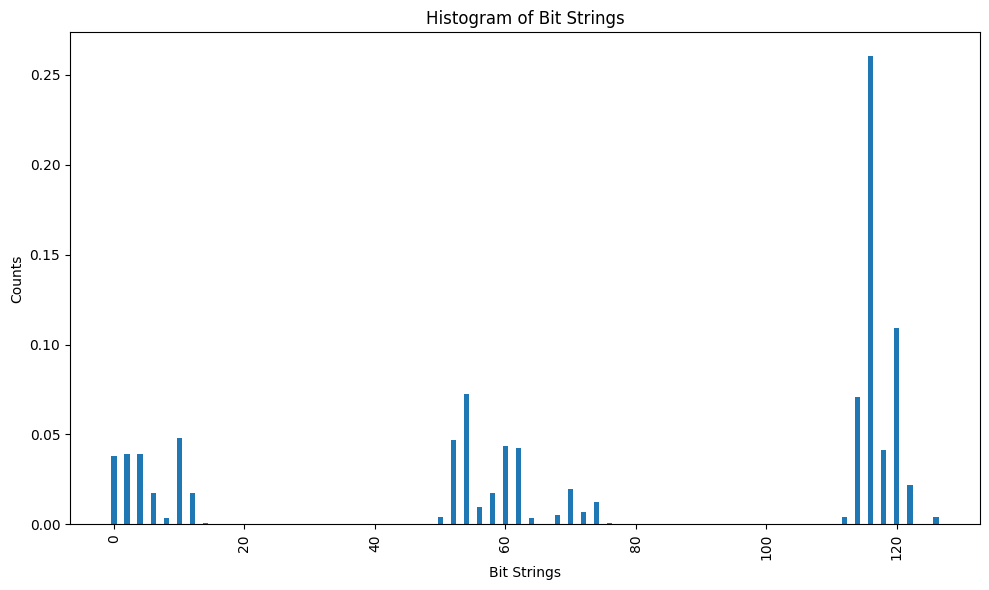

In [ ]:
counts = list_quasi_probs[21]
bit_strings = list(counts.keys())
counts = list(counts.values())

# Plot the histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(bit_strings, counts)
plt.xlabel('Bit Strings')
plt.ylabel('Counts')
plt.title('Histogram of Bit Strings')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
from PIL import Image

image = Image.open("C:/Users/luisj/OneDrive/Escritorio/virtual/Lena.bmp")

In [ ]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


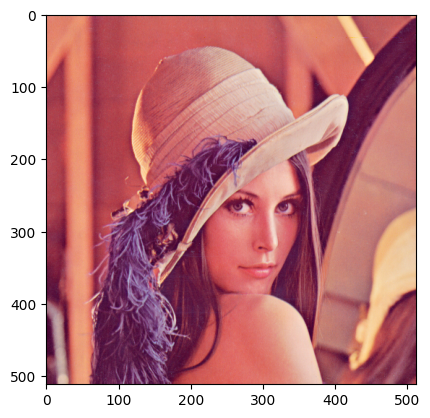

In [18]:
import matplotlib.image as img
import cv2
image = img.imread("Lena.png")
image.shape
plt.imshow(image)

In [19]:
scaled_image = cv2.resize(image, (0, 0), fx=0.25, fy=0.25)
scaled_image.shape

(128, 128, 3)

In [ ]:
Y = scaled_image[0,:,0]
coefficients = linear_combination(vectors, Y)
print("Coeficientes de la combinación lineal:", coefficients)
reconstructed_Y = np.dot(np.array(vectors).T, coefficients)
print("Vector reconstruido:", reconstructed_Y)
print("Vector original:", Y)

Coeficientes de la combinación lineal: [ -0.06992822  -0.58392453  -0.87354325  -0.33418307   0.74104065
  -3.00304739  -1.64915062   0.76574837   0.74387507  -8.34526428
 -10.23171401   0.63437713  -0.88687354  -9.97370979 -12.81666787
  -1.0150751   -0.76214165  -2.65681967  -3.70962696  -0.89712738
   1.94957822   3.15183053   1.48215951   1.50106239   3.67023741
   1.24086411   1.46334547   3.54084125   4.03306495  -2.2639823
  -1.51830315   3.25638491   5.23615433   0.78991521   0.59330412
   5.94411689   6.13842336   2.38081188   2.34259516   5.29272699
  12.56866465   1.66856433   2.32692945  13.54849085  10.35939795
   1.27338307   1.71912841  13.54436547]
Vector reconstruido: [7.28069298e-01 7.35392539e-01 8.34648878e-01 8.64506185e-01
 8.28449631e-01 9.63708480e-01 9.15224798e-01 9.85607613e-01
 9.22676584e-01 9.04830676e-01 9.00135728e-01 8.58265423e-01
 9.06604403e-01 1.00229758e+00 9.14932268e-01 7.30444656e-01
 6.51834391e-01 9.05184211e-01 9.05205312e-01 2.28471484e-01
 

In [15]:
def linear_combination(vectors, Y):
    A = np.array(vectors).T  
    Y = np.array(Y)
    coef, residuals, rank, s = np.linalg.lstsq(A, Y, rcond=None)
    return coef

def get_linear_combination(vectors, img):

    dim = img.shape
    list_coefficients = []
    for i in range(dim[1]):
        v = scaled_image[i,:,0]
        coefficients = linear_combination(vectors, v)
        list_coefficients.append(coefficients)
    
    return list_coefficients

def calculate_linear_combination(vectors, list_coefficients, img):
    img_shape = img.shape
    reconstructed_img = np.zeros(img_shape)
    
    for i in range(len(list_coefficients)):
        reconstructed_row = np.zeros((img_shape[1], img_shape[2]))
        for vector, coef in zip(vectors, list_coefficients[i]):
            reconstructed_row[:, 0] += vector * coef  # Red channel
        reconstructed_img[i, :, 0] = reconstructed_row[:, 0]  # Assuming the image is 3D (height x width x channels)
    
    return reconstructed_img

In [33]:
list_coefficients = get_linear_combination(vectors, scaled_image)

In [34]:
aux = calculate_linear_combination(vectors, list_coefficients, scaled_image)

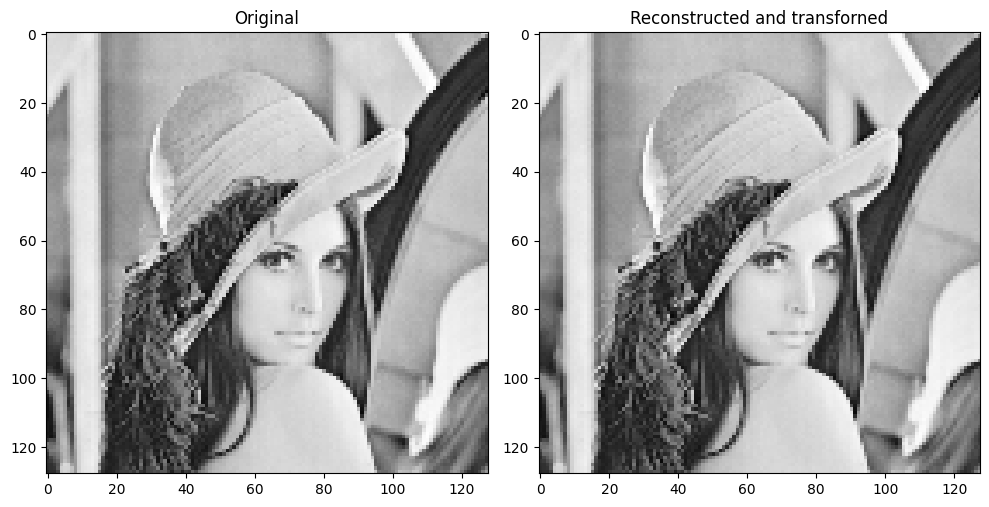

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))



# Mostramos la segunda imagen
ax[0].imshow(scaled_image[:, :, 0], cmap='gray')
ax[0].set_title('Original')

# Mostramos la primera imagen
ax[1].imshow(aux[:, :, 0], cmap='gray')
ax[1].set_title('Reconstructed and transforned')

# Ajustamos el layout para que no se solapen los títulos y las imágenes
plt.tight_layout()

# Mostramos la figura
plt.show()

In [ ]:
len(coefficients)

125

In [ ]:
coefficients = linear_combination(vectors, Y)
print("Coeficientes de la combinación lineal:", coefficients)

# Verificar la combinación lineal
reconstructed_Y = np.dot(np.array(vectors).T, coefficients)
print("Vector reconstruido:", reconstructed_Y)
print("Vector original:", Y)

Coeficientes de la combinación lineal: [ 3.20313055e-01  6.70521353e+00 -1.18471037e+02  3.98216278e+00
 -1.21682385e-01 -6.66509109e+00  1.97145563e+01 -1.91859947e+02
  1.86360769e+01 -6.77982359e+00 -7.59812170e+00  1.03485536e+02
 -7.38375020e+01  1.05899030e+02 -8.63558942e+00  1.30106526e+01
  1.50989488e+02 -2.90756162e+02  1.50922170e+02  1.23882439e+01
 -1.00613028e+01  5.58469601e+01  9.35473749e+01  5.34065897e+01
 -8.16679055e+00 -4.62106793e+01  2.91319566e+02  2.33634592e+02
  2.89142421e+02 -4.63151554e+01 -3.85410340e+01  2.59171959e+01
 -9.70293564e+01  2.39660330e+01 -3.88520258e+01 -2.91211722e+00
  1.06001425e+02 -1.33948957e+02  1.04952239e+02 -2.71798764e+00
 -1.36282031e+01 -1.04713056e+02  2.24788707e+01 -1.03911665e+02
 -1.16221382e+01 -1.46390791e+02 -3.39112627e+02  3.04486217e+01
 -3.38714035e+02 -1.46001912e+02 -1.74945033e+01  1.65797295e+02
 -2.95958885e+01  1.65864530e+02 -2.26787707e+01  4.49970471e+00
  3.12860575e+02 -3.10471206e+01  3.13088709e+02  4

In [ ]:
import numpy as np

def linear_combination(vectors, Y):
    """
    Encuentra la combinación lineal de una lista de vectores que resulta en el vector Y.

    :param vectors: Lista de vectores (lista de listas o 2D numpy array)
    :param Y: Vector objetivo (lista o 1D numpy array)
    :return: Coeficientes de la combinación lineal
    """
    A = np.array(vectors).T  
    Y = np.array(Y)
    
    coef, residuals, rank, s = np.linalg.lstsq(A, Y, rcond=None)
    
    return coef

# Ejemplo de uso
vectors = [[3, 4, 1], [0, 1, 4], [2, 3, 1]]  # Vectores base en R^3
Y = [1, 2, 3]  # Vector objetivo en R^3

coefficients = linear_combination(vectors, Y)
print("Coeficientes de la combinación lineal:", coefficients)

# Verificar la combinación lineal
reconstructed_Y = np.dot(np.array(vectors).T, coefficients)
print("Vector reconstruido:", reconstructed_Y)
print("Vector original:", Y)

Coeficientes de la combinación lineal: [3.33333333e-01 6.66666667e-01 2.85001299e-15]
Vector reconstruido: [1. 2. 3.]
Vector original: [1, 2, 3]


In [ ]:
service = QiskitRuntimeService(channel="ibm_cloud")
 
# Bell Circuit
qr = QuantumRegister(2, name="qr")
cr = ClassicalRegister(2, name="cr")
qc = QuantumCircuit(qr, cr, name="bell")
qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.measure(qr, cr)
 
with Session(service, backend="ibmq_qasm_simulator") as session:
    sampler = Sampler(session=session)
 
    job = sampler.run(qc, shots=1024)
    print(f"Job ID: {job.job_id()}")
    print(f"Job result: {job.result()}")
 
    # You can run more jobs inside the session

AccountNotFoundError: 'Unable to find account.'

In [ ]:
 
#service = QiskitRuntimeService()
service = QiskitRuntimeService(
    channel='ibm_quantum',
    #instance='ibm-q/open/main',
    )
backend = service.least_busy(operational=True, simulator=False)
 
# Bell Circuit
qr = QuantumRegister(2, name="qr")
cr = ClassicalRegister(2, name="cr")
qc = QuantumCircuit(qr, cr, name="bell")
qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.measure(qr, cr)
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
with Session(backend=backend) as session:
    sampler = Sampler(session=session)
    job = sampler.run([isa_circuit])
    pub_result = job.result()[0]
    print(f"Sampler job ID: {job.job_id()}")
    print(f"Counts: {pub_result.data.cr.get_counts()}")

In [ ]:
from qiskit.primitives import Sampler
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
 
# a Bell circuit
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()
 
# two parameterized circuits
pqc = RealAmplitudes(num_qubits=2, reps=2)
pqc.measure_all()
pqc2 = RealAmplitudes(num_qubits=2, reps=3)
pqc2.measure_all()
 
theta1 = [0, 1, 1, 2, 3, 5]
theta2 = [0, 1, 2, 3, 4, 5, 6, 7]
 
# initialization of the sampler
sampler = Sampler()
 
# Sampler runs a job on the Bell circuit
job = sampler.run(circuits=[bell], parameter_values=[[]], parameters=[[]])
job_result = job.result()
print([q.binary_probabilities() for q in job_result.quasi_dists])
 
# Sampler runs a job on the parameterized circuits
job2 = sampler.run(
    circuits=[pqc, pqc2],
    parameter_values=[theta1, theta2],
    parameters=[pqc.parameters, pqc2.parameters])
job_result = job2.result()
print([q.binary_probabilities() for q in job_result.quasi_dists])

[{'00': 0.4999999999999999, '11': 0.4999999999999999}]
[{'00': 0.1309248462975777, '01': 0.3608720796028448, '10': 0.0932486523205006, '11': 0.4149544217790772}, {'00': 0.1880263994380416, '01': 0.6881971261189544, '10': 0.0932623272058244, '11': 0.0305141472371799}]


In [ ]:
import numpy as np

def linear_combination(vectors, Y):
    """
    Encuentra la combinación lineal de una lista de vectores que resulta en el vector Y.

    :param vectors: Lista de vectores (lista de listas o 2D numpy array)
    :param Y: Vector objetivo (lista o 1D numpy array)
    :return: Coeficientes de la combinación lineal
    """
    # Convertir la lista de vectores y Y a matrices de NumPy si no lo son
    A = np.array(vectors).T  # Transponer para que cada vector sea una columna
    Y = np.array(Y)
    
    # Resolver el problema de los mínimos cuadrados lineales
    coef, residuals, rank, s = np.linalg.lstsq(A, Y, rcond=None)
    
    return coef

# Ejemplo de uso
vectors = [[3, 4, 1], [0, 1, 4], [2, 3, 1]]  # Vectores base en R^3
Y = [1, 2, 3]  # Vector objetivo en R^3

coefficients = linear_combination(vectors, Y)
print("Coeficientes de la combinación lineal:", coefficients)

# Verificar la combinación lineal
reconstructed_Y = np.dot(np.array(vectors).T, coefficients)
print("Vector reconstruido:", reconstructed_Y)
print("Vector original:", Y)

Coeficientes de la combinación lineal: [3.33333333e-01 6.66666667e-01 2.85001299e-15]
Vector reconstruido: [1. 2. 3.]
Vector original: [1, 2, 3]


In [ ]:
A = np.array(vectors).T
A[:,0]*0.33+A[:,1]*0.66

array([0.99, 1.98, 2.97])

# IJ matrix QW

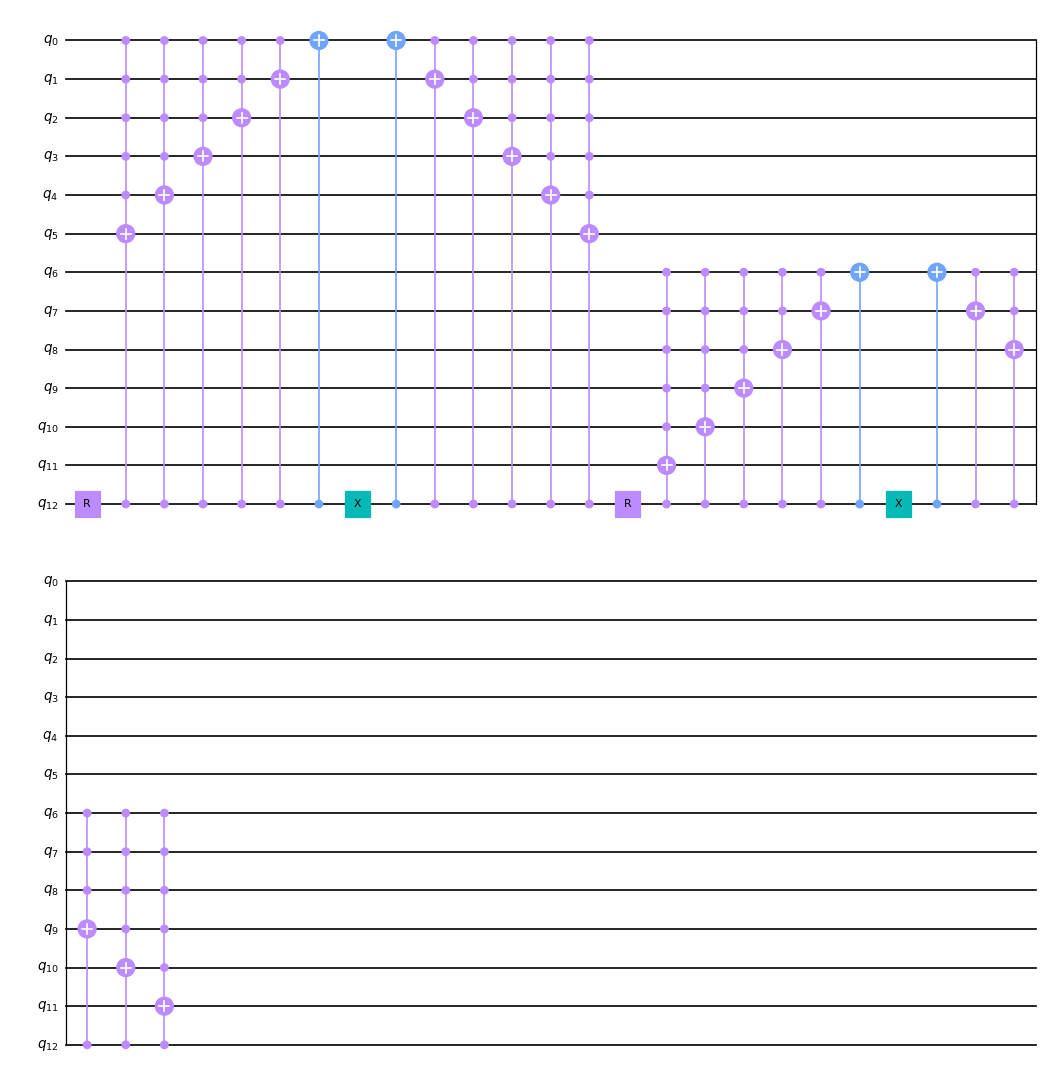

In [ ]:
one_step_circuit = QuantumCircuit(13, name='ONE STEP')

beta = np.pi / 3  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')

gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.cx(r_gate, 0+n)

def decrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.cx(r_gate, 0+n)
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])


one_step_circuit.append(R_gate, [12])
incrementBlock(one_step_circuit, 0, 12, R_gate)
one_step_circuit.x(12)
decrementBlock(one_step_circuit, 0, 12, R_gate)

one_step_circuit.append(R_gate, [12])
incrementBlock(one_step_circuit, 6, 12, R_gate)
one_step_circuit.x(12)
decrementBlock(one_step_circuit, 6, 12, R_gate)

one_step_gate = one_step_circuit.to_instruction()
circuit_drawer(one_step_circuit, scale=0.6, output='mpl')

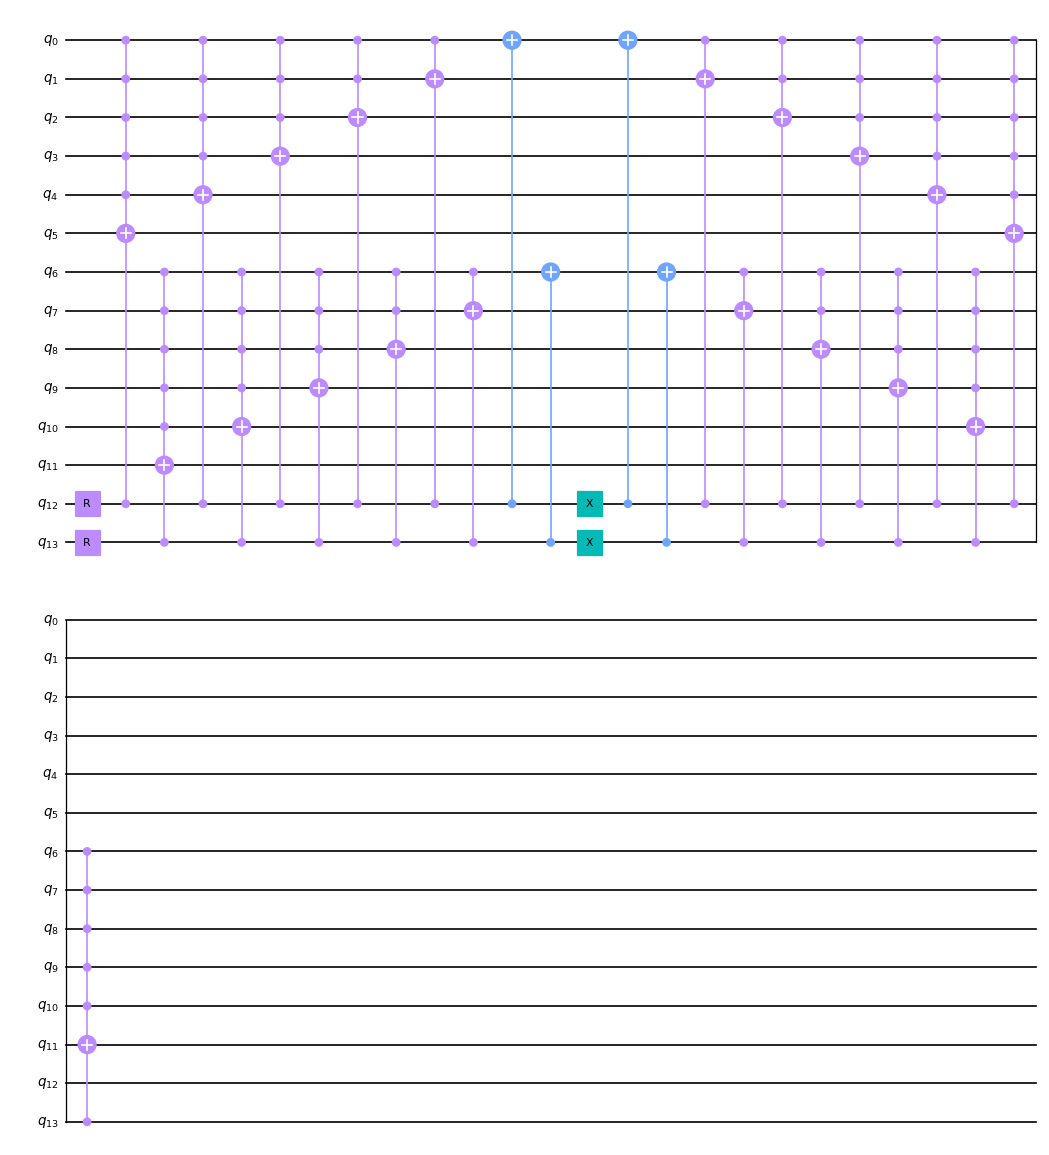

In [ ]:
one_step_circuit = QuantumCircuit(14, name='ONE STEP')


beta = np.pi / 5  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')


gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.cx(r_gate, 0+n)

def decrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.cx(r_gate, 0+n)
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])


one_step_circuit.append(R_gate, [12])
incrementBlock(one_step_circuit, 0, 12, R_gate)
one_step_circuit.x(12)
decrementBlock(one_step_circuit, 0, 12, R_gate)

one_step_circuit.append(R_gate, [13])
incrementBlock(one_step_circuit, 6, 13, R_gate)
one_step_circuit.x(13)
decrementBlock(one_step_circuit, 6, 13, R_gate)

one_step_gate = one_step_circuit.to_instruction()

circuit_drawer(one_step_circuit, scale=0.6, output='mpl')

In [ ]:
#circuit_drawer(circuit, scale=0.6, output='mpl')

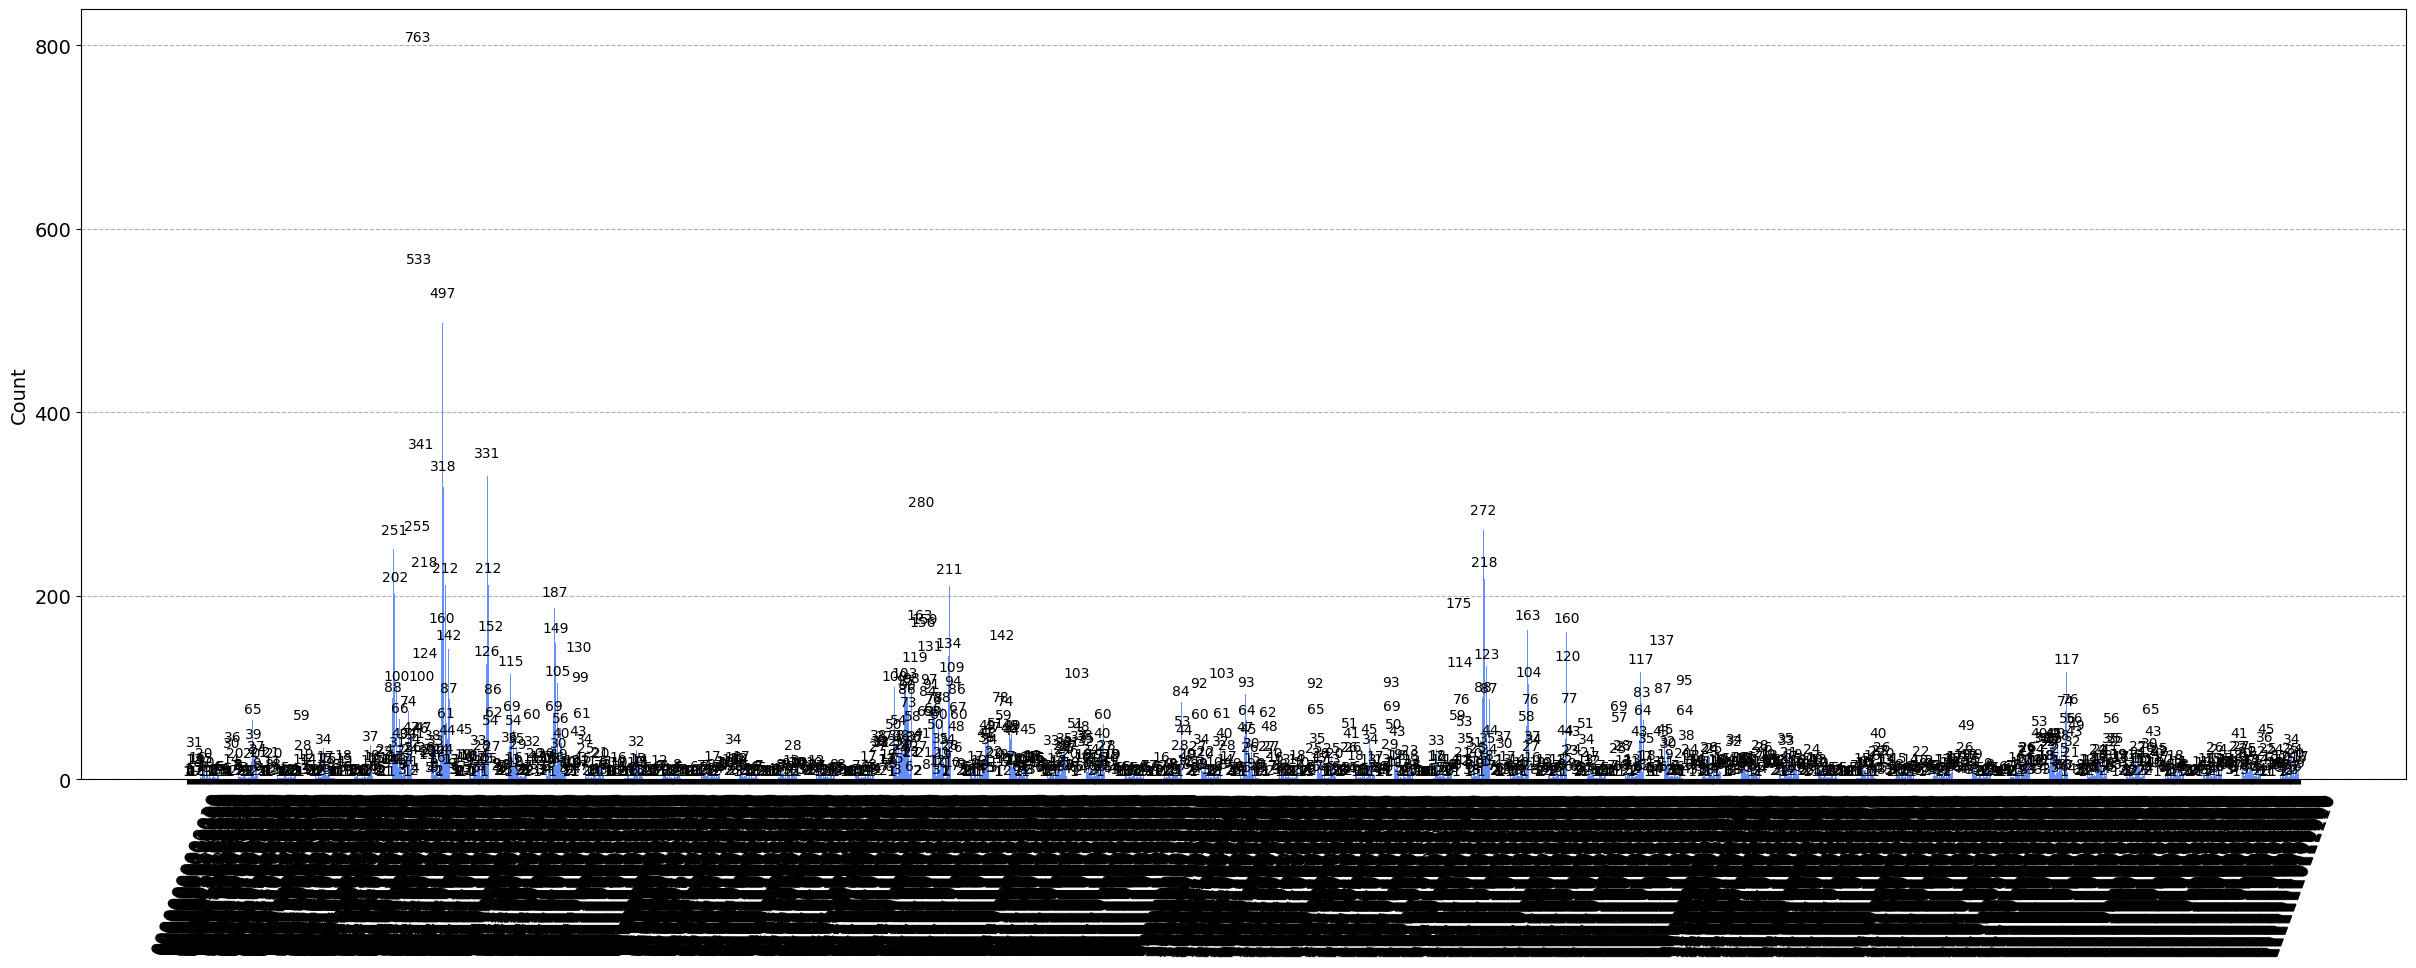

In [ ]:
one_step_circuit = QuantumCircuit(14, name='ONE STEP')


beta = np.pi / 3  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')

beta = np.pi / 3  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')


gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.cx(r_gate, 0+n)

def decrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.cx(r_gate, 0+n)
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])


one_step_circuit.append(R_gate, [12])
incrementBlock(one_step_circuit, 0, 12, R_gate)
one_step_circuit.x(12)
decrementBlock(one_step_circuit, 0, 12, R_gate)
one_step_circuit.x(12)

one_step_circuit.append(R_gate, [13])
incrementBlock(one_step_circuit, 6, 13, R_gate)
one_step_circuit.x(13)
decrementBlock(one_step_circuit, 6, 13, R_gate)
one_step_circuit.x(13)

one_step_gate = one_step_circuit.to_instruction()


num_steps = 50

# Create Quantum Registers and Classical Registers
qr = QuantumRegister(14, 'q')
cr = ClassicalRegister(14, 'c')
circuit = QuantumCircuit(qr, cr)

#for i in range(0,12):
#    circuit.x(i)

circuit.h(12)
circuit.h(13)
for _ in range(num_steps):
    circuit.append(one_step_gate, qr)
    
circuit.measure(qr, cr)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=8*4096)
result = job.result()

# Get and plot the measurement results
counts = result.get_counts(circuit)
plot_histogram(counts, sort='asc', figsize =(30,10))

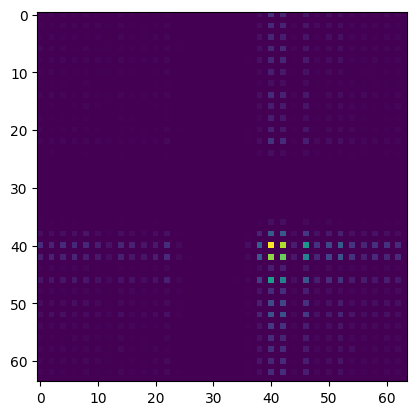

In [ ]:
mat = np.zeros((64,64))
for i in range(0,64):
    for j in range(0,64):
        cont = 0
        cad = bin(i)[2:].zfill(6)+bin(j)[2:].zfill(6)
        cad00 = '00'+cad
        if cad00 in counts:
            cont = cont + counts[cad00]
        cad01 = '01'+cad
        if cad01 in counts:
            cont = cont + counts[cad01]
        cad10 = '10'+cad
        if cad10 in counts:
            cont = cont + counts[cad10]
        cad11 = '11'+cad
        if cad11 in counts:
            cont = cont + counts[cad11]
        mat[i,j] = cont
        #print(bin(i)[2:].zfill(6)+bin(j)[2:].zfill(6) )
#counts[]
plt.imshow(mat*100)

In [ ]:
len(counts)

1102

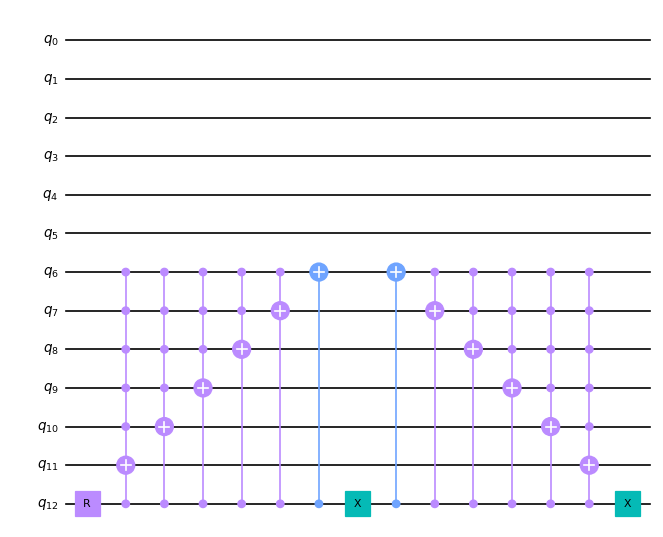

In [ ]:
beta = np.pi / 6  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')

gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.cx(r_gate, 0+n)

def decrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.cx(r_gate, 0+n)
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])

j_step_circuit = QuantumCircuit(13, name='J STEP')

j_step_circuit.append(R_gate, [12])
incrementBlock(j_step_circuit, 0, 12, R_gate)
j_step_circuit.x(12)
decrementBlock(j_step_circuit, 0, 12, R_gate)
j_step_circuit.x(12)

j_step_gate = j_step_circuit.to_instruction()

#circuit.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 12)

i_step_circuit = QuantumCircuit(13, name='I STEP')

i_step_circuit.append(R_gate, [12])
incrementBlock(i_step_circuit, 6, 12, R_gate)
i_step_circuit.x(12)
decrementBlock(i_step_circuit, 6, 12, R_gate)
i_step_circuit.x(12)

i_step_gate = i_step_circuit.to_instruction()

circuit_drawer(j_step_circuit, scale=0.6, output='mpl')

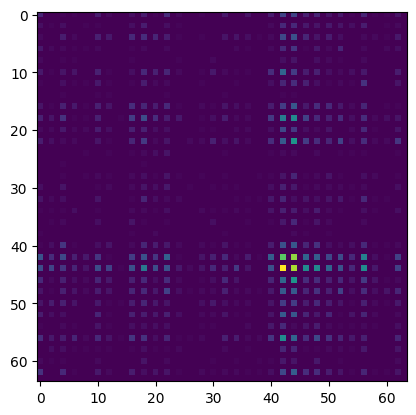

In [ ]:
plt.imshow(mat)

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.extensions import UnitaryGate

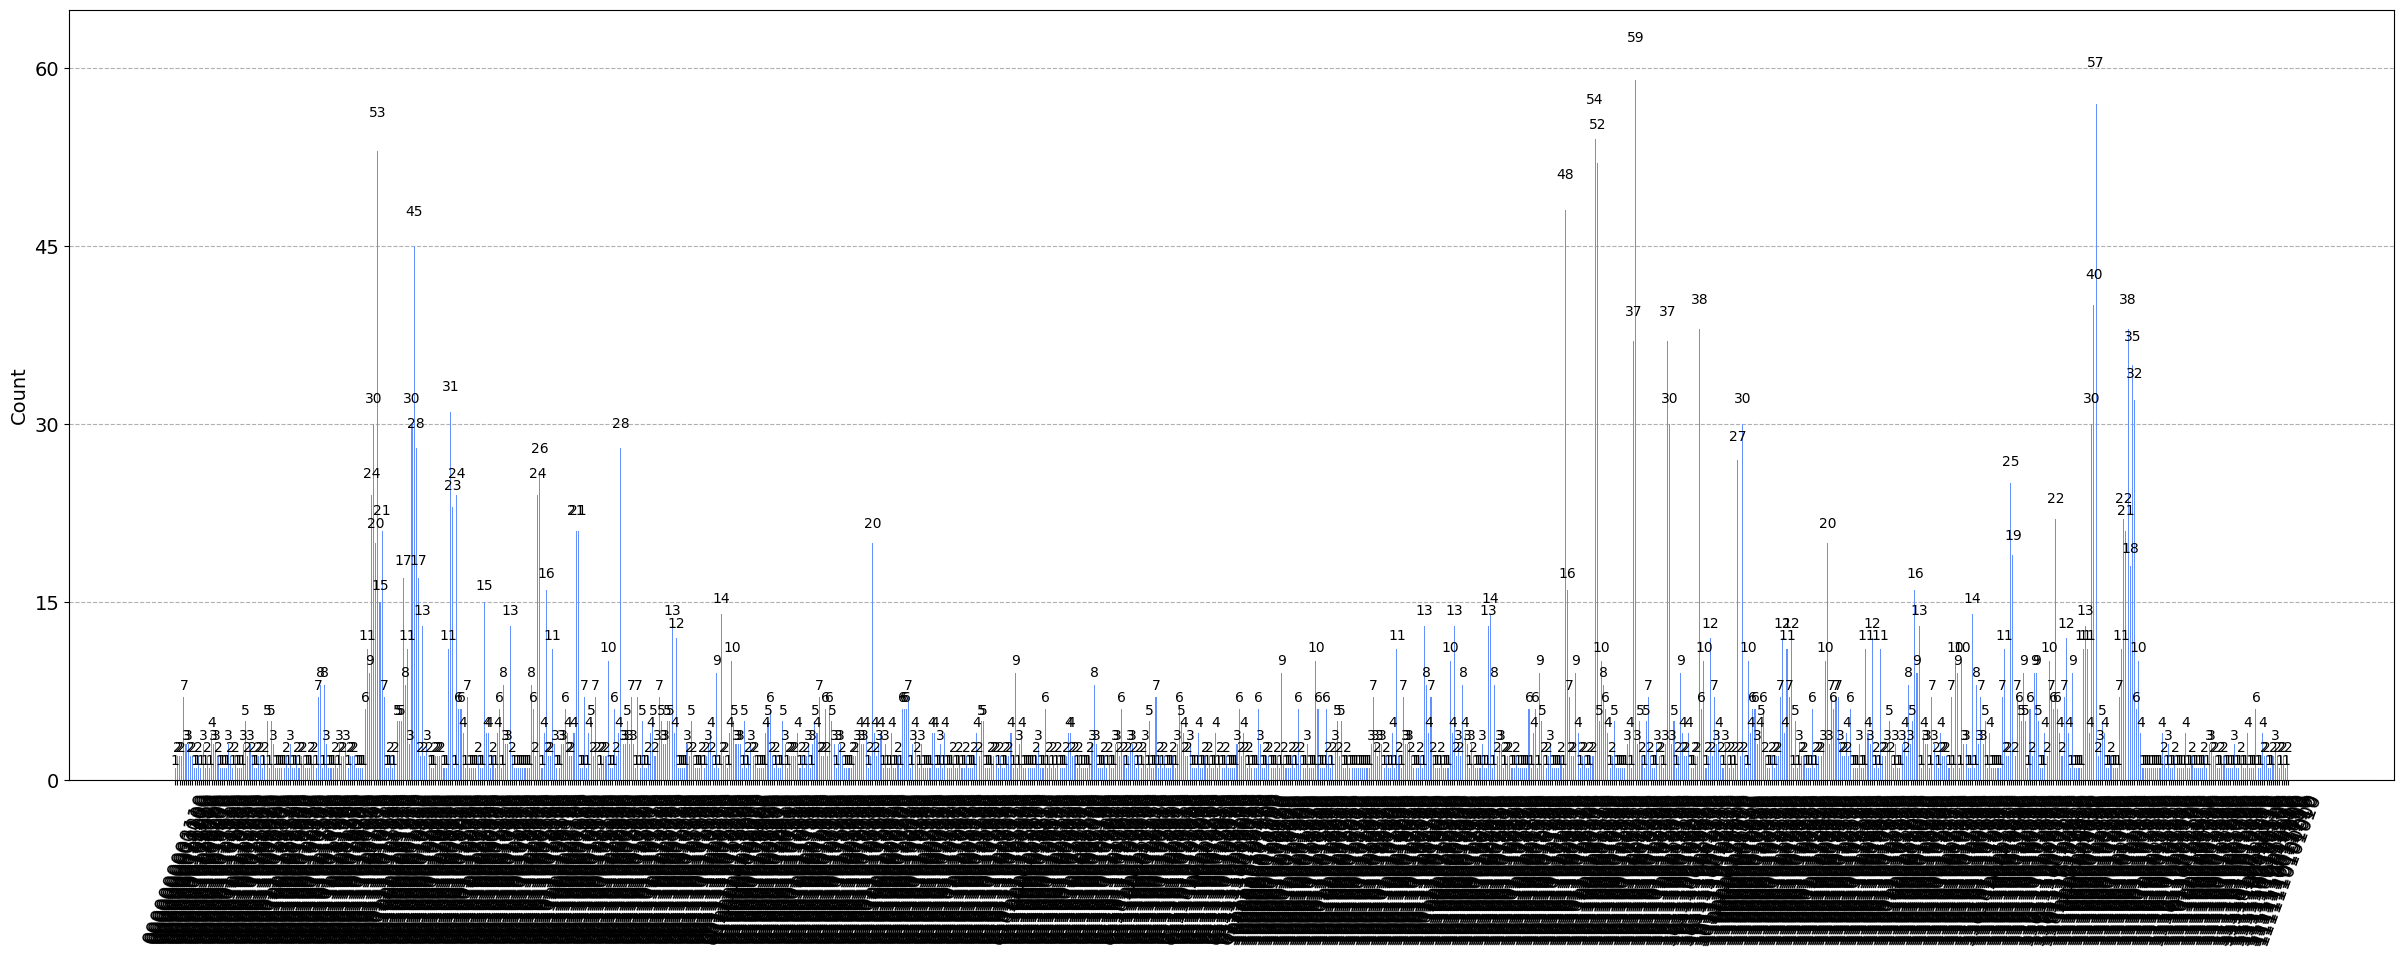

In [ ]:
one_step_circuit = QuantumCircuit(13, name='ONE STEP')


beta = np.pi / 3  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')

inverse_R_gate = R_gate.inverse()

gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.cx(r_gate, 0+n)

def decrementBlock(circuit, n, r_gate, coin):
    #circuit.append(coin, [r_gate])
    circuit.cx(r_gate, 0+n)
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])


#circuit.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 12)

one_step_circuit.append(R_gate, [12])
incrementBlock(one_step_circuit, 0, 12, R_gate)
one_step_circuit.x(12)
decrementBlock(one_step_circuit, 0, 12, R_gate)
one_step_circuit.x(12)

#one_step_circuit.append(inverse_R_gate, [12])

one_step_circuit.append(R_gate, [12])
incrementBlock(one_step_circuit, 6, 12, R_gate)
one_step_circuit.x(12)
decrementBlock(one_step_circuit, 6, 12, R_gate)
one_step_circuit.x(12)

one_step_gate = one_step_circuit.to_instruction()


num_steps = 50

qr = QuantumRegister(13, 'q')
cr = ClassicalRegister(13, 'c')
circuit = QuantumCircuit(qr, cr)

#for i in range(0,6):
#    circuit.x(i)
#circuit.x(5)

circuit.h(12)
for _ in range(num_steps):
    circuit.append(one_step_gate, qr)

circuit.measure(qr, cr)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=4096)
result = job.result()

# Get and plot the measurement results
counts = result.get_counts(circuit)
plot_histogram(counts, sort='asc', figsize =(30,10))

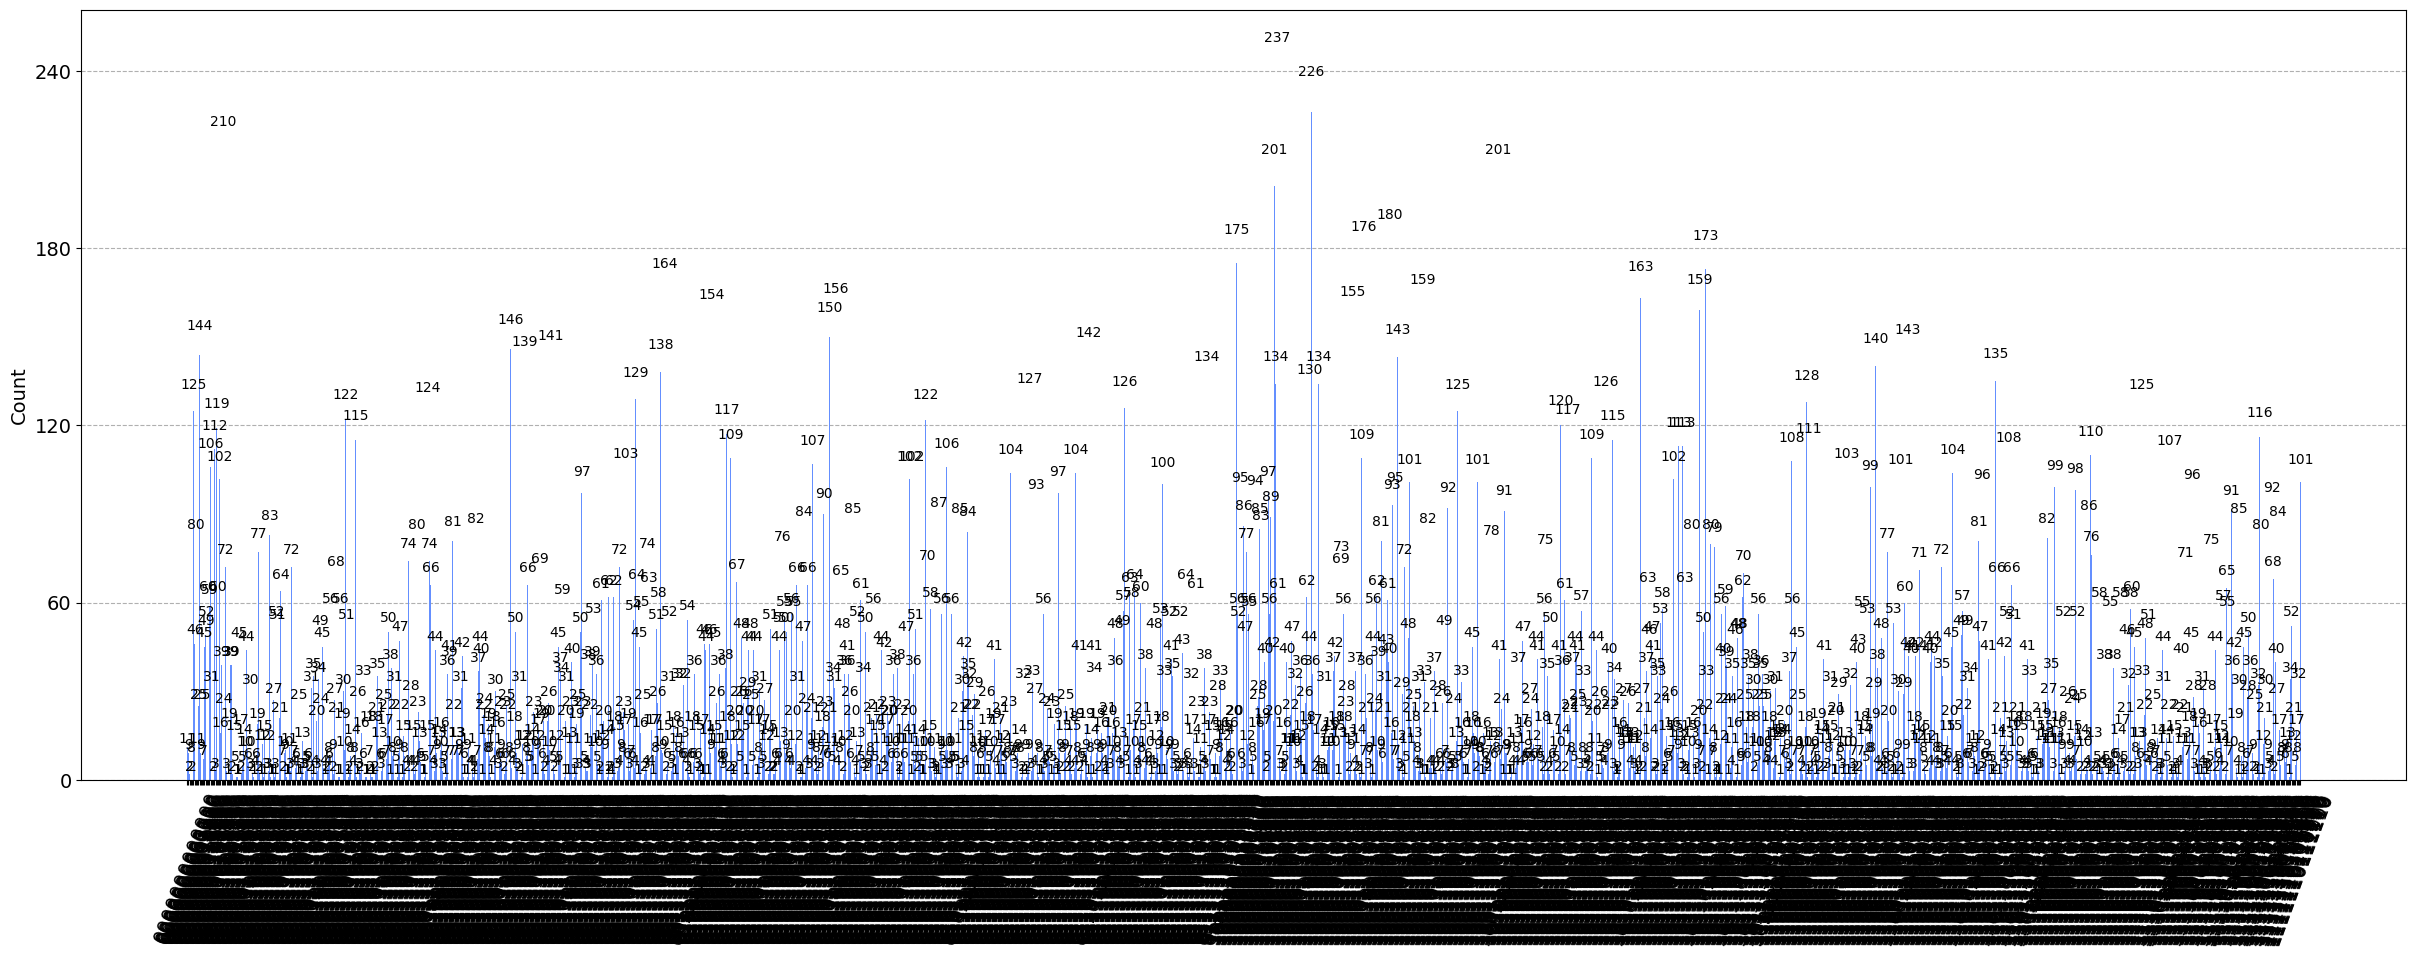

In [ ]:
one_step_circuit = QuantumCircuit(13, name='ONE STEP')


beta = np.pi / 5  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')

inverse_R_gate = R_gate.inverse()

gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit, n, r_gate):
    #circuit.append(coin, [r_gate])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.cx(r_gate, 0+n)

def decrementBlock(circuit, n, r_gate):
    #circuit.append(coin, [r_gate])
    circuit.cx(r_gate, 0+n)
    circuit.ccx(0+n, r_gate, 1+n)
    circuit.append(gate3, [0+n, 1+n, r_gate, 2+n])
    circuit.append(gate4, [0+n, 1+n, 2+n, r_gate, 3+n])
    circuit.append(gate5, [0+n, 1+n, 2+n, 3+n, r_gate, 4+n])
    circuit.append(gate6, [0+n, 1+n, 2+n, 3+n, 4+n, r_gate, 5+n])

one_step_circuit.append(R_gate, [12])
incrementBlock(one_step_circuit, 0, 12)
one_step_circuit.x(12)
decrementBlock(one_step_circuit, 0, 12)

one_step_circuit.append(R_gate, [12])
incrementBlock(one_step_circuit, 6, 12)
one_step_circuit.x(12)
decrementBlock(one_step_circuit, 6, 12)
one_step_circuit.x(12)

one_step_gate = one_step_circuit.to_instruction()


num_steps = 500

qr = QuantumRegister(13, 'q')
cr = ClassicalRegister(13, 'c')
circuit = QuantumCircuit(qr, cr)


circuit.h(12)
for _ in range(num_steps):
    circuit.append(one_step_gate, qr)

circuit.measure(qr, cr)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=20*2048)
result = job.result()

# Get and plot the measurement results
counts = result.get_counts(circuit)
plot_histogram(counts, sort='asc', figsize =(30,10))

In [ ]:
len(counts)

611

In [ ]:
mat1 = mat

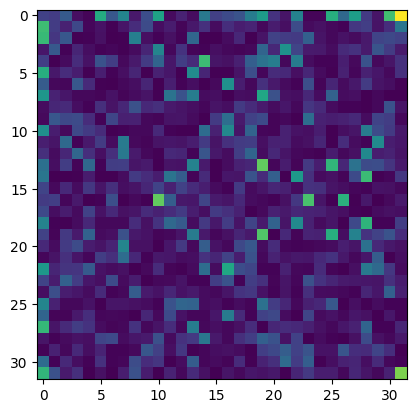

In [ ]:
mat = np.zeros((32,32))
for i in range(0,32):
    for j in range(0,32):
        cont = 0
        cad = bin(i*2)[2:].zfill(6)+bin(j*2)[2:].zfill(6)
        cad0 = '0'+cad
        if cad0 in counts:
            cont = cont + counts[cad0]
        cad1 = '1'+cad
        if cad1 in counts:
            cont = cont + counts[cad1]
        
        mat[i,j] = cont
        #print(bin(i)[2:].zfill(6)+bin(j)[2:].zfill(6) )
#counts[]
plt.imshow(mat*100)

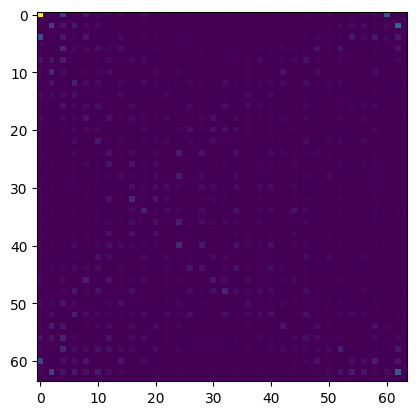

In [ ]:
mat = np.zeros((64,64))
for i in range(0,64):
    for j in range(0,64):
        cont = 0
        cad = bin(i)[2:].zfill(6)+bin(j)[2:].zfill(6)
        cad0 = '0'+cad
        if cad0 in counts:
            cont = cont + counts[cad0]
        cad1 = '1'+cad
        if cad1 in counts:
            cont = cont + counts[cad1]
        
        mat[i,j] = cont
        #print(bin(i)[2:].zfill(6)+bin(j)[2:].zfill(6) )
#counts[]
plt.imshow(mat*100)

In [ ]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 3.5 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip available: 23.1.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2

In [ ]:
resized = cv2.resize(mat, (100,100), interpolation = cv2.INTER_AREA)

In [ ]:
temp = np.floor( ( resized /np.max(resized) )*255 ).astype(np.uint8)
temp

array([[ 49,  49,  49, ..., 255, 255, 255],
       [ 49,  49,  49, ..., 255, 255, 255],
       [ 49,  49,  49, ..., 255, 255, 255],
       ...,
       [167, 167, 167, ..., 204, 204, 204],
       [167, 167, 167, ..., 204, 204, 204],
       [167, 167, 167, ..., 204, 204, 204]], dtype=uint8)

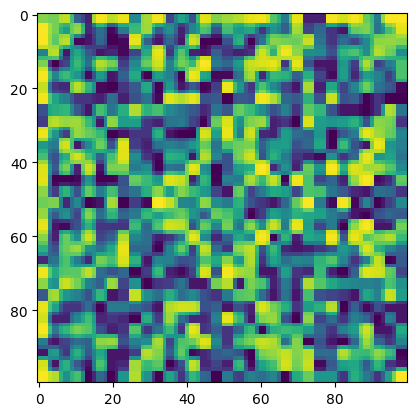

In [ ]:
#temp = np.array(resized)
dst = cv2.equalizeHist(temp)
plt.imshow(dst, vmin=0, vmax=255)

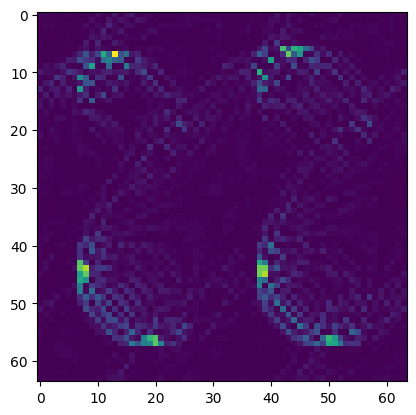

In [ ]:
mat2 = mat + mat1
plt.imshow(mat2*100)

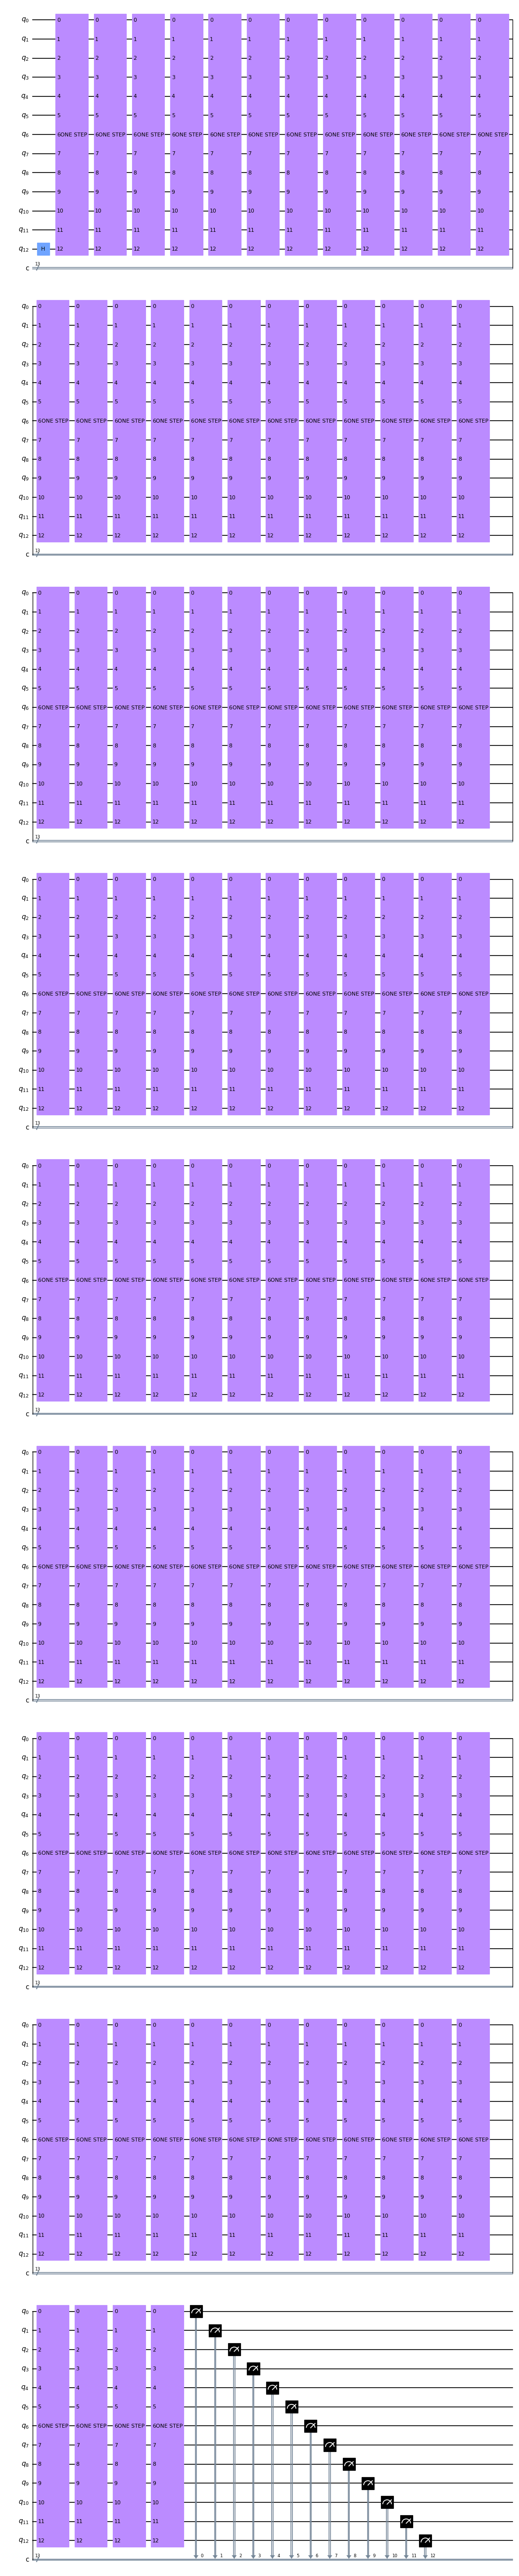

In [ ]:
circuit_drawer(circuit, scale=0.6, output='mpl')

In [ ]:
#counts

In [ ]:
len(counts)

809

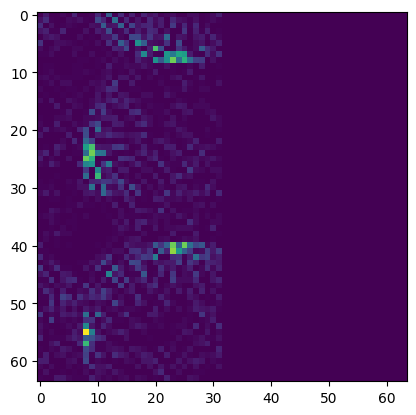

In [ ]:
plt.imshow(mat*100)

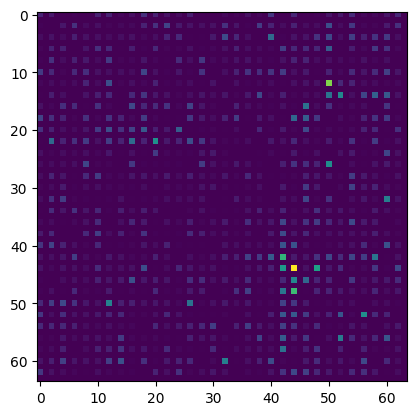

In [ ]:
plt.imshow(mat)

In [ ]:
# Define a Quantum Circuit
one_step_circuit = QuantumCircuit(7, name='ONE STEP')


beta = np.pi / 5  # Adjust the value of beta as needed
C_matrix = np.array([[np.cos(beta), np.sin(beta)], [np.sin(beta), -np.cos(beta)]])
R_gate = UnitaryGate(C_matrix, label='R')


gate3 = MCXGate(3)
gate4 = MCXGate(4)
gate5 = MCXGate(5)
gate6 = MCXGate(6)

def incrementBlock(circuit):
    circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])
    circuit.append(gate5, [0, 1, 2, 3, 6, 4])
    circuit.append(gate4, [0, 1, 2, 6, 3])
    circuit.append(gate3, [0, 1, 6, 2])
    circuit.ccx(0, 6, 1)
    circuit.cx(6,0)

def decrementBlock(circuit):
    circuit.cx(6,0)
    circuit.ccx(0, 6, 1)
    circuit.append(gate3, [0, 1, 6, 2])
    circuit.append(gate4, [0, 1, 2, 6, 3])
    circuit.append(gate5, [0, 1, 2, 3, 6, 4])
    circuit.append(gate6, [0, 1, 2, 3, 4, 6, 5])

one_step_circuit.append(R_gate, [6])
incrementBlock(one_step_circuit)
one_step_circuit.x(6)
decrementBlock(one_step_circuit)
one_step_gate = one_step_circuit.to_instruction()


num_steps = 123
num_steps1 = 20

# Create Quantum Registers and Classical Registers
qr = QuantumRegister(7, 'q')
cr = ClassicalRegister(7, 'c')
circuit = QuantumCircuit(qr, cr)



for _ in range(num_steps):
    circuit.append(one_step_gate, qr)
    
#for _ in range(num_steps1):
#    circuit.append(sec_step_gate, qr)
    
circuit.measure(qr, cr)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=5000)
result = job.result()

# Get and plot the measurement results
counts = result.get_counts(circuit)
plot_histogram(counts, sort='asc', figsize =(30,10))


Traceback (most recent call last):
  Cell In[150], line 47
    circuit.x(i)
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:3837 in x
    return self.append(XGate(label=label), [qubit], [])
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1278 in append
    expanded_qargs = [self.qbit_argument_conversion(qarg) for qarg in qargs or []]
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1278 in <listcomp>
    expanded_qargs = [self.qbit_argument_conversion(qarg) for qarg in qargs or []]
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1149 in qbit_argument_conversion
    return _bit_argument_conversion(
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:5226 in _bit_argument_conversion
    raise CircuitError(
CircuitError: 'Index 7 out of range for size 7.'

Use %tb to get the full traceback.


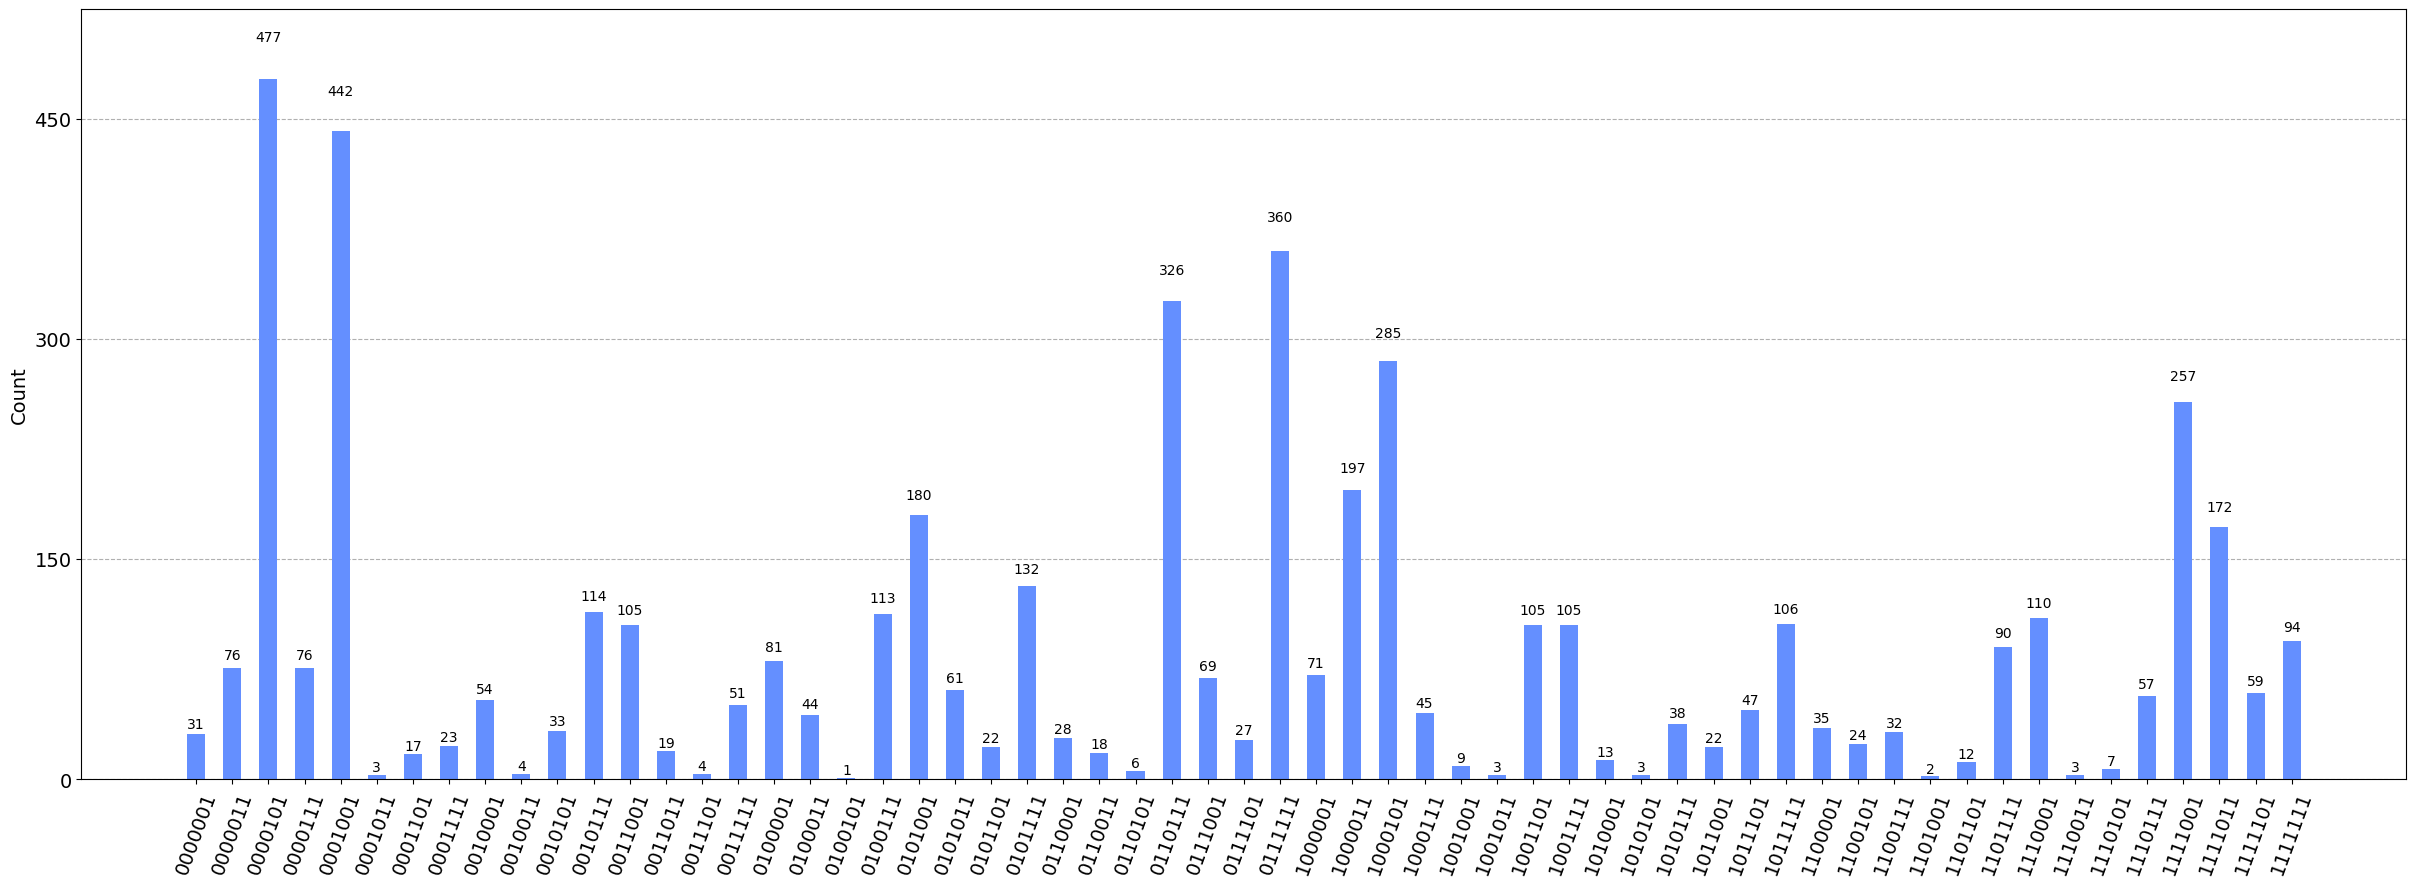

In [ ]:
counts = result.get_counts(circuit)
plot_histogram(counts, sort='asc', figsize =(30,10))

In [ ]:
len(counts)

56

In [ ]:
simulator = Aer.get_backend('qasm_simulator')

# Number of shots (how many times to run the circuit)
shots = 1024  # You can adjust this number as needed

# Run the simulation
job = execute(circuit, simulator, shots=shots)

# Get the results
result = job.result()

# Get the counts (frequencies of each outcome)
counts = result.get_counts(circuit)

# Calculate the probabilities
probabilities = {state: count / shots for state, count in counts.items()}

# Print the probabilities
#for state, prob in probabilities.items():
#    print(f"State: {state}, Probability: {prob}")

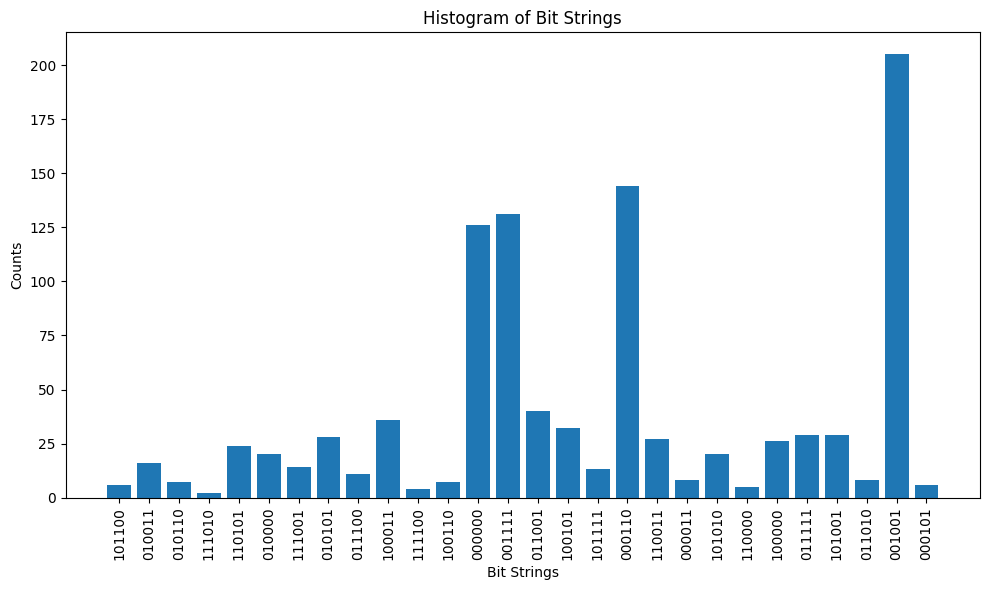

In [ ]:
bit_strings = list(counts.keys())
counts = list(counts.values())

# Plot the histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(bit_strings, counts)
plt.xlabel('Bit Strings')
plt.ylabel('Counts')
plt.title('Histogram of Bit Strings')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()